In [139]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [140]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [141]:
#Start with spring and work our way down to winter
season = 1
season_year = 2006
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2006-03-01 to 2006-05-31
Columns: 287 entries, 10000009 to 26000084
dtypes: float64(287)
memory usage: 207.0 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-03-01  0.779862  1.083935  0.565680  0.811320  0.524360  1.558417   
2006-03-02  0.749263  1.083866  0.526227  0.799548  0.519377  1.507567   
2006-03-03  0.736899  1.083236  0.507409  0.801482  0.511576  1.451686   
2006-03-04  0.704785  1.057962  0.480368  0.780506  0.496858  1.418950   
2006-03-05  0.672687  1.042174  0.464722  0.778604  0.482056  1.375471   
...              ...       ...       ...       ...       ...       ...   
2006-05-27  0.583601  0.575964  0.426747  0.619306  0.479954  0.668674   
2006-05-28  0.702395  0.645046  0.487482  0.675249  0.543367  0.674213   
2006-05-29  0.903731  0.629914  0.437588  0.722678  0.518262  0.679753   
2006-05-30  0.727934  0.569775  0.409038  0.690740  0.482876  0.674366   
2006-05-31  0.641599  0.540513  0.382243  0.640897  0.465929  0.658605   

            11000016  12000001  13000011  13000019  ...  66000014  67000017  \
2006-03-01  1.047114  0.534694  

          2006-03-01  2006-03-02  2006-03-03  2006-03-04  2006-03-05  \
10000009   -0.064850   -0.064957   -0.064296   -0.064539   -0.064948   
10000010   -0.039478   -0.036945   -0.035322   -0.035116   -0.034129   
10000011   -0.082721   -0.083628   -0.083495   -0.083235   -0.082294   
10000014   -0.062225   -0.060747   -0.058893   -0.058231   -0.056113   
10000016   -0.086169   -0.084202   -0.083146   -0.081862   -0.080848   
...              ...         ...         ...         ...         ...   
8000001     0.007360    0.001676   -0.001059   -0.003774   -0.006930   
9000001     0.003610    0.004088    0.002958    0.002162    0.002371   
9000015    -0.000934   -0.000282   -0.001172   -0.001698   -0.001310   
22000047   -0.094599   -0.091868   -0.090787   -0.089835   -0.088265   
26000084   -0.010177   -0.012993   -0.017927   -0.021601   -0.024200   

          2006-03-06  2006-03-07  2006-03-08  2006-03-09  2006-03-10  ...  \
10000009   -0.065445   -0.064721   -0.064844   -0.063222  

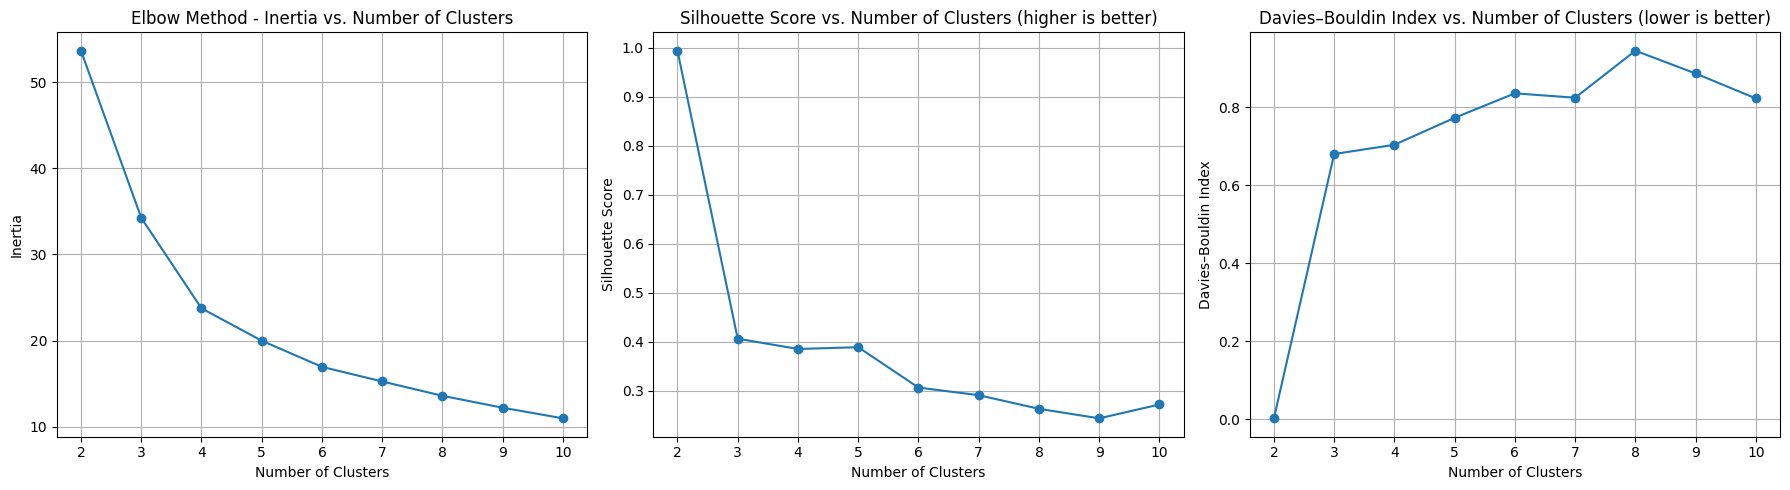

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-03-01  0.779862  1.083935  0.565680  0.811320  0.524360  1.558417   
2006-03-02  0.749263  1.083866  0.526227  0.799548  0.519377  1.507567   
2006-03-03  0.736899  1.083236  0.507409  0.801482  0.511576  1.451686   
2006-03-04  0.704785  1.057962  0.480368  0.780506  0.496858  1.418950   
2006-03-05  0.672687  1.042174  0.464722  0.778604  0.482056  1.375471   
...              ...       ...       ...       ...       ...       ...   
2006-05-27  0.583601  0.575964  0.426747  0.619306  0.479954  0.668674   
2006-05-28  0.702395  0.645046  0.487482  0.675249  0.543367  0.674213   
2006-05-29  0.903731  0.629914  0.437588  0.722678  0.518262  0.679753   
2006-05-30  0.727934  0.569775  0.409038  0.690740  0.482876  0.674366   
2006-05-31  0.641599  0.540513  0.382243  0.640897  0.465929  0.658605   

            11000016  12000001  13000011  13000019  ...  66000014  67000017  \
2006-03-01  1.047114  0.534694  

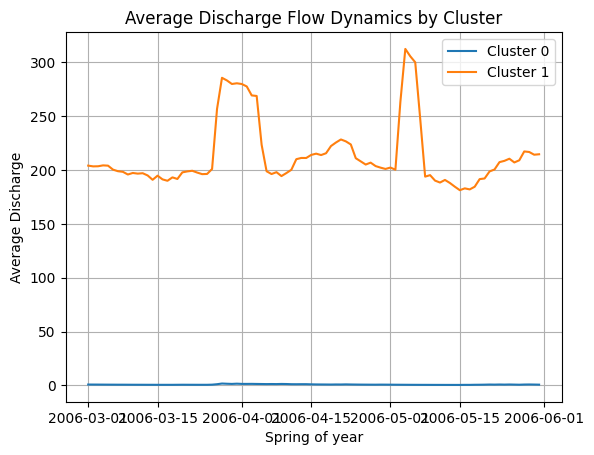

In [143]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [144]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [145]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2006-03-01  0.779862  1.083935  0.565680  0.811320  0.524360  1.558417   
2006-03-02  0.749263  1.083866  0.526227  0.799548  0.519377  1.507567   
2006-03-03  0.736899  1.083236  0.507409  0.801482  0.511576  1.451686   
2006-03-04  0.704785  1.057962  0.480368  0.780506  0.496858  1.418950   
2006-03-05  0.672687  1.042174  0.464722  0.778604  0.482056  1.375471   
...              ...       ...       ...       ...       ...       ...   
2006-05-27  0.583601  0.575964  0.426747  0.619306  0.479954  0.668674   
2006-05-28  0.702395  0.645046  0.487482  0.675249  0.543367  0.674213   
2006-05-29  0.903731  0.629914  0.437588  0.722678  0.518262  0.679753   
2006-05-30  0.727934  0.569775  0.409038  0.690740  0.482876  0.674366   
2006-05-31  0.641599  0.540513  0.382243  0.640897  0.465929  0.658605   

            11000016  12000001  13000011  13000019  ...  66000014  67000017  \
2006-03-01  1.047114  0.534694  0.523424  0.843566  ...  0.442014  0.271320   
2006-03-02  0.987976  0.525603  0.512012  0.817276  ...  0.373194  0.253736   
2006-03-03  0.966614  0.521321  0.501810  0.807594  ...  0.340523  0.244319   
2006-03-04  0.920512  0.510237  0.480271  0.782366  ...  0.315471  0.243080   
2006-03-05  0.883910  0.495236  0.457145  0.753513  ...  0.298875  0.218295   
...              ...       ...       ...       ...  ...       ...       ...   
2006-05-27  0.750051  0.449238  0.451780  0.704195  ...  0.155547  0.070570   
2006-05-28  0.879431  0.492789  0.604741  0.902781  ...  0.285571  0.110713   
2006-05-29  0.887127  0.465781  0.598695  0.864312  ...  0.298637  0.246646   
2006-05-30  0.788170  0.450339  0.534382  0.756716  ...  0.253582  0.190583   
2006-05-31  0.725032  0.442441  0.473167  0.699655  ...  0.230616  0.156612   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2006-03-01  0.679400  0.767516  0.559356  1.645278  1.600336  1.545869   
2006-03-02  0.623461  0.717675  0.524976  1.545207  1.574021  1.521810   
2006-03-03  0.541708  0.691993  0.514343  1.492792  1.540809  1.491446   
2006-03-04  0.514284  0.668553  0.499886  1.434163  1.505411  1.459083   
2006-03-05  0.427033  0.628894  0.480767  1.368269  1.479773  1.435643   
...              ...       ...       ...       ...       ...       ...   
2006-05-27  0.178680  0.326136  0.793366  1.200632  1.212930  1.191681   
2006-05-28  0.479972  0.694335  0.784673  1.143442  1.272067  1.245747   
2006-05-29  0.671813  0.762320  0.775359  1.163358  1.351167  1.318065   
2006-05-30  0.469853  0.598460  0.642350  1.232283  1.324644  1.293816   
2006-05-31  0.348443  0.569053  0.555458  1.036287  1.265976  1.240179   

            22000047  26000084  
2006-03-01  0.423329  1.435106  
2006-03-02  0.427798  1.369980  
2006-03-03  0.420234  1.291159  
2006-03-04  0.401148  1.220182  
2006-03-05  0.393134  1.161215  
...              ...       ...  
2006-05-27  0.021253  1.319883  
2006-05-28  0.046998  1.367304  
2006-05-29  0.028746  1.388994  
2006-05-30  0.014860  1.377024  
2006-05-31  0.010921  1.333669  

[92 rows x 287 columns]

<Axes: >

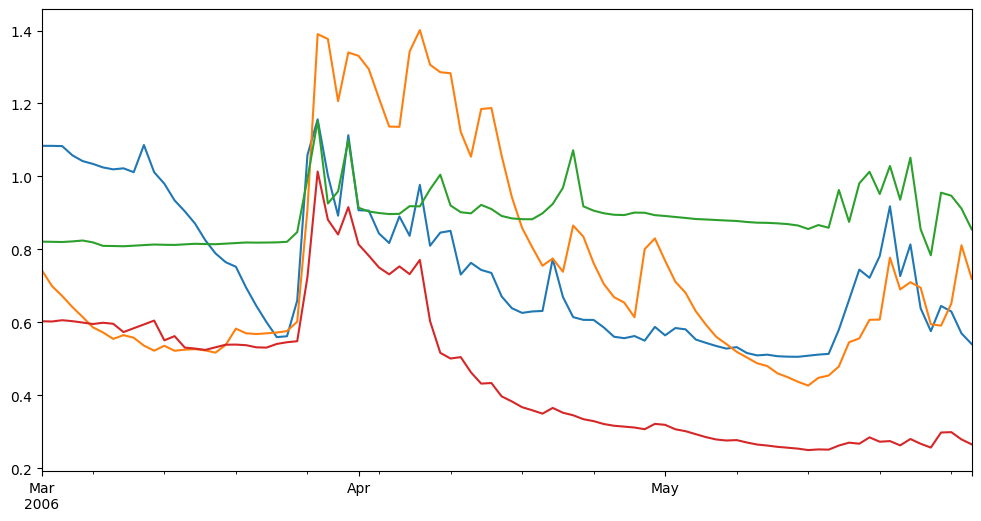

In [146]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

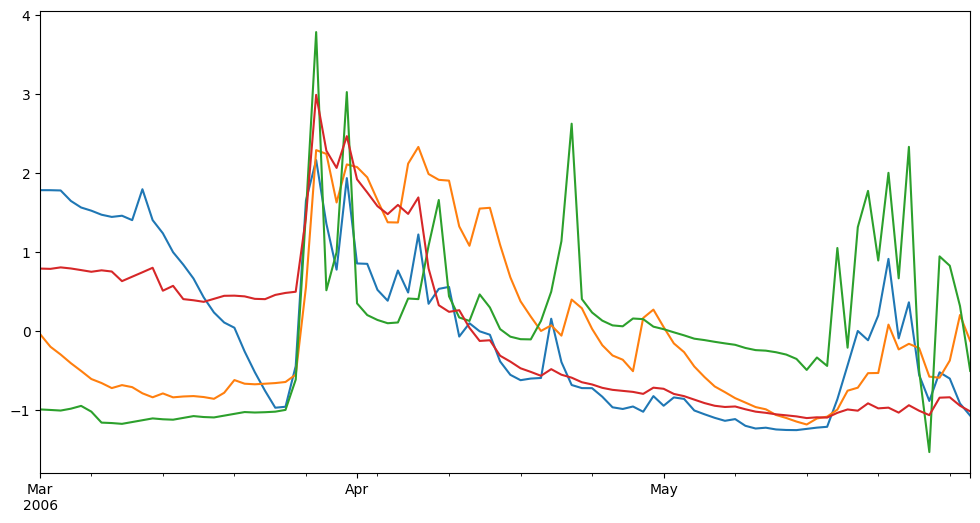

In [147]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

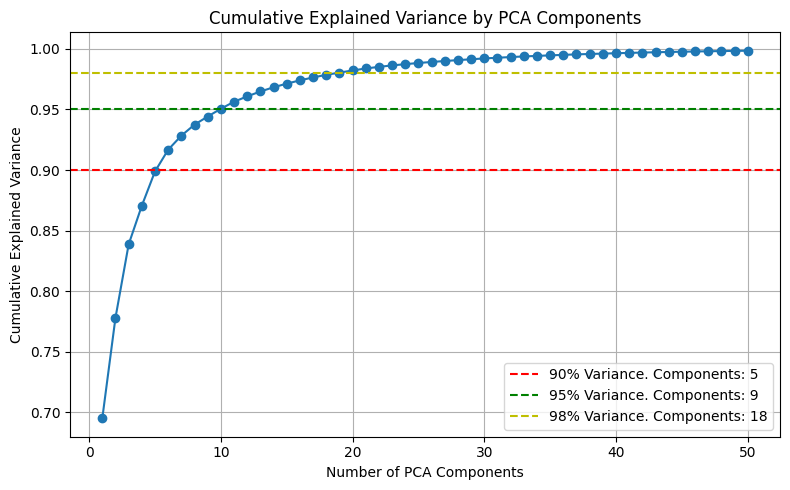

In [148]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [149]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.41845588,  6.25978984,  1.49866879, ...,  0.02590588,
         0.41009655,  0.06912384],
       [-0.08046847,  5.88427266,  1.53340171, ...,  0.22625482,
         0.34889068,  0.08283946],
       [-1.27776743,  5.4796001 ,  1.88592498, ...,  0.09895425,
         0.67336281,  0.11683623],
       ...,
       [ 3.61210424, -5.54018555, -6.50536987, ...,  0.79364144,
         1.79446196, -1.26301169],
       [-0.32197481, -3.8133152 , -5.12541267, ...,  0.11150663,
         0.31178488,  0.55541291],
       [-4.60522053, -2.80633396, -4.53523411, ..., -1.04092401,
        -1.63078834,  0.9259141 ]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


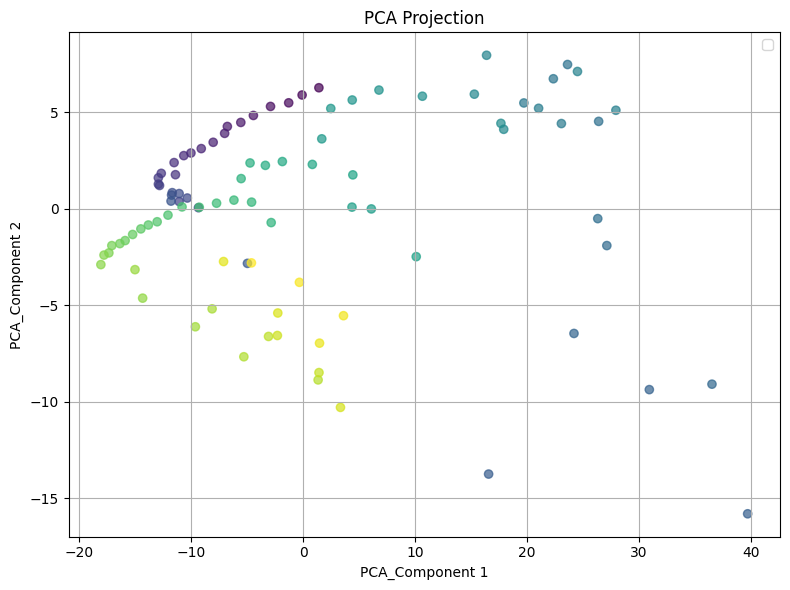

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


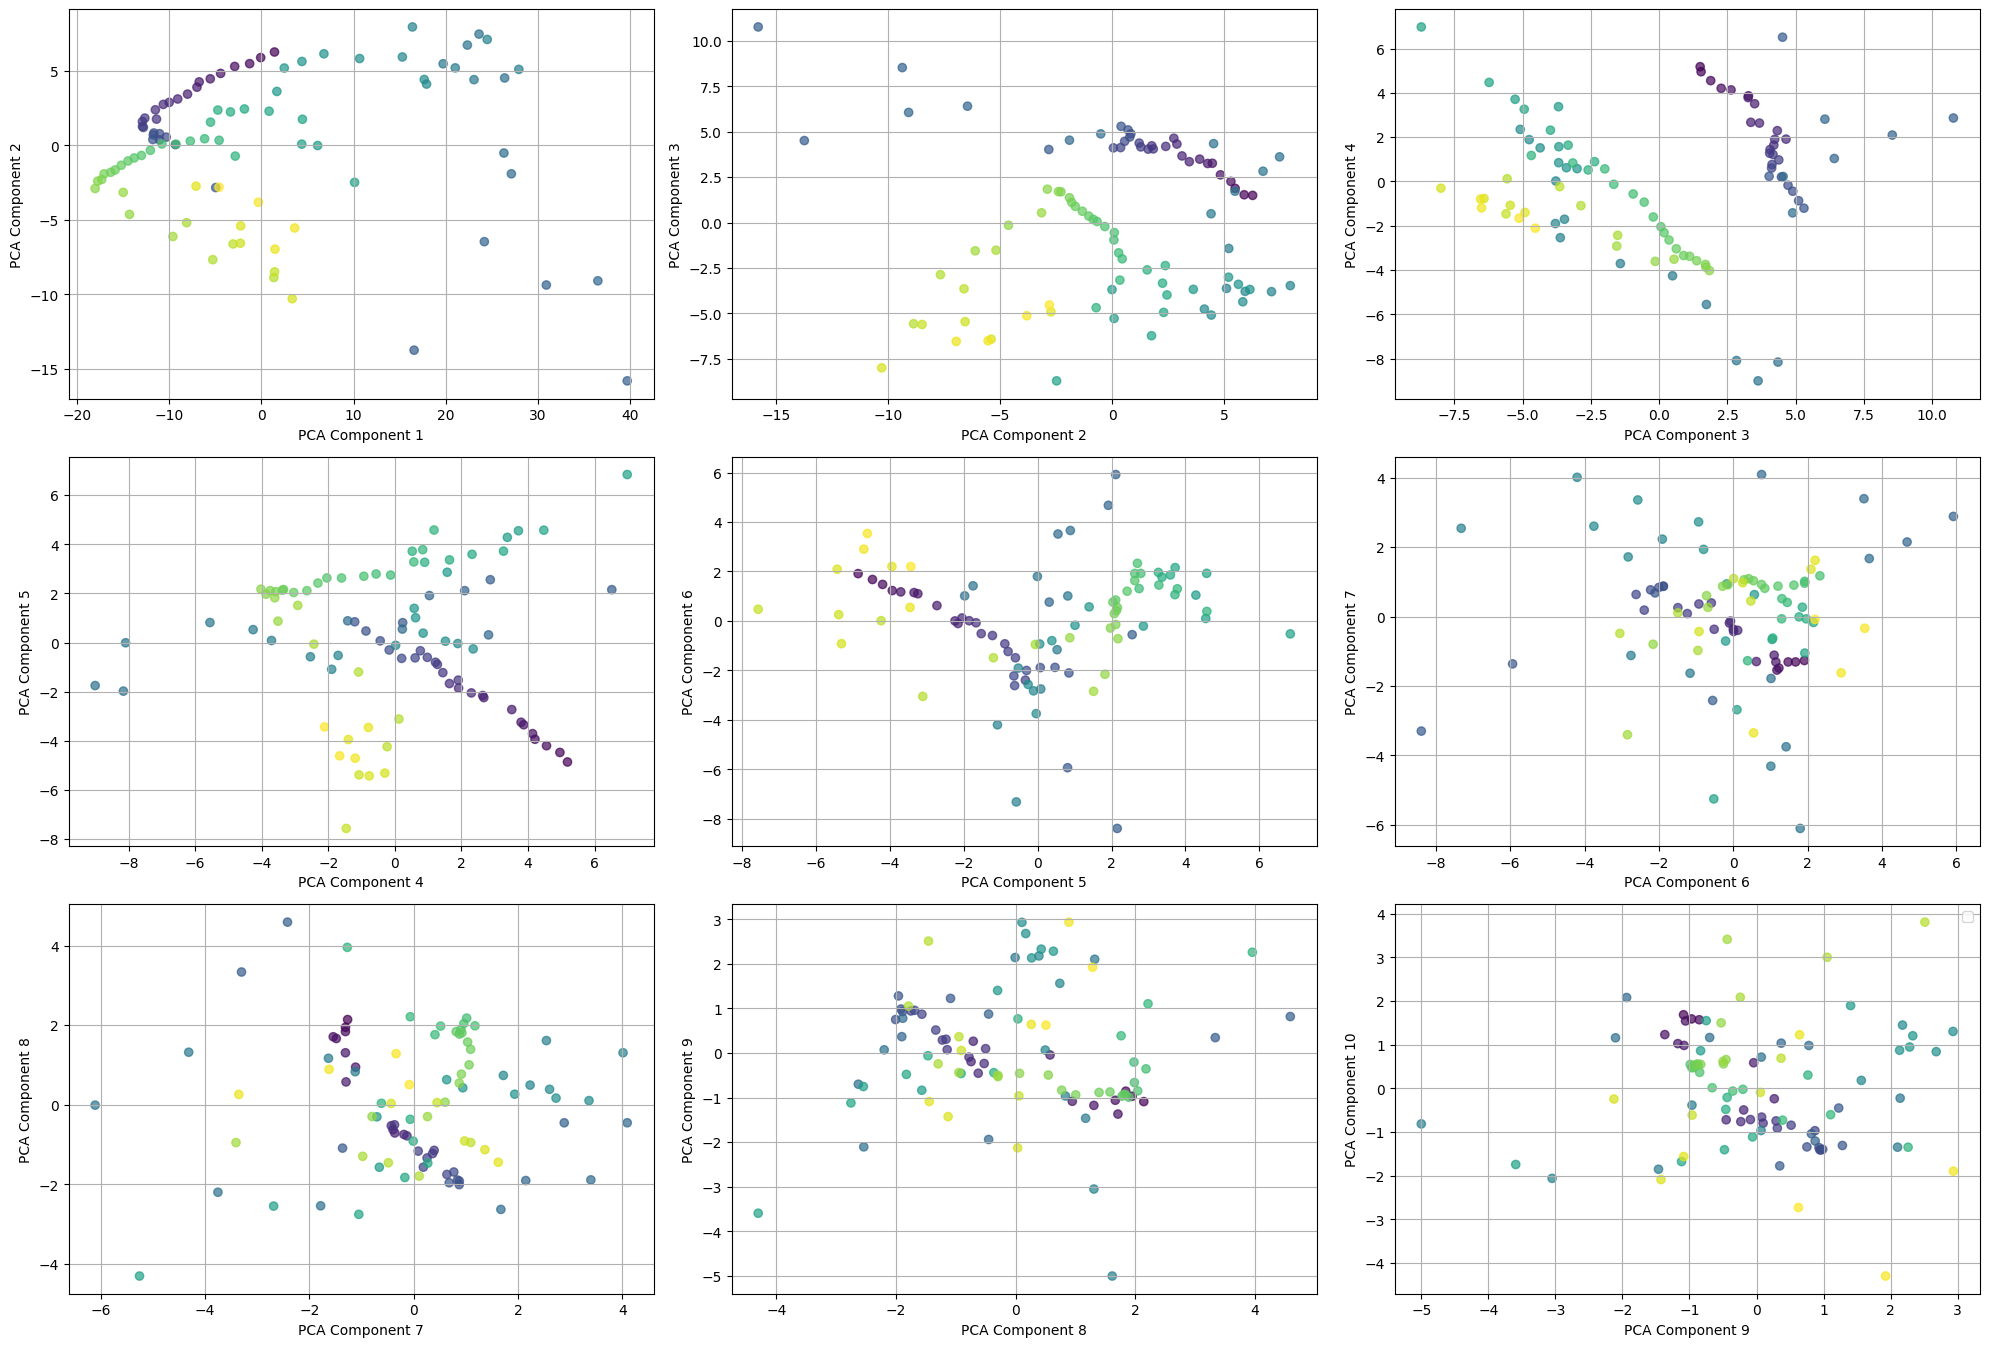

In [151]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [152]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.298
KMeans Davies-Bouldin Index is 1.054


<Axes: xlabel='k'>

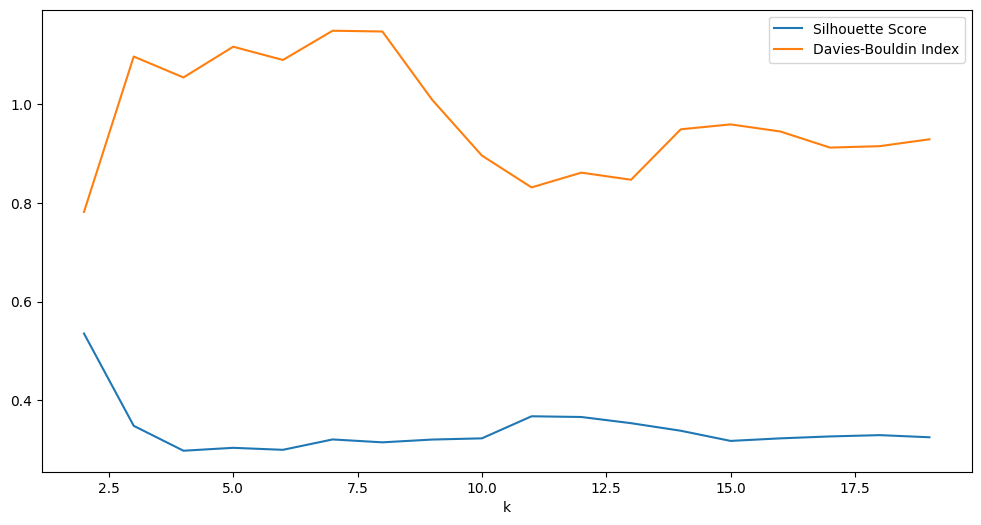

In [153]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         3     82         -0.115369   
3    1.27            3         3     75         -0.003665   
4    1.52            3         4     69          0.028141   
5    1.78            3         5     62          0.005713   
6    2.03            3         4     55          0.121168   
7    2.29            3         4     54          0.126511   
8    2.54            3         4     51          0.116794   
9    2.80            3         5     47          0.145710   
10   3.05            3         3     47          0.078257   
11   3.31            3         4     44          0.040224   
12   3.56            3         4     41          0.084827   
13   3.82            3         4     41          0.084827   
14   4.07            3         3     41          0.070687   
15   4.33            3         3     40          0.081503   
16   4.58            3         4     36          0.086799   
17   4.84            3         5     31          0.068386   
18   5.09            3         5     30          0.075902   
19   5.35            3         5     30          0.075902   
20   5.60            3         5     30          0.075902   
21   5.86            3         6     27          0.096577   
22   6.11            3         5     27          0.138216   
23   6.37            3         4     27          0.151438   
24   6.62            3         4     18          0.156204   
25   6.88            3         4     15          0.165258   
26   7.13            3         3     15          0.102747   
27   7.39            3         3     13          0.115116   
28   7.64            3         3     13          0.115116   
29   7.90            3         2     13          0.093458   
30   8.15            3         1     12               NaN   
31   8.41            3         1     10               NaN   
32   8.66            3         2      5          0.363521   
33   8.92            3         2      5          0.363521   
34   9.17            3         2      5          0.363521   
35   9.43            3         2      5          0.363521   
36   9.68            3         2      5          0.363521   
37   9.94            3         2      4          0.395778   
38  10.19            3         2      4          0.395778   
39  10.45            3         2      4          0.395778   
40  10.70            3         2      4          0.395778   
41  10.96            3         2      3          0.399203   
42  11.21            3         2      3          0.399203   
43  11.47            3         2      3          0.399203   
44  11.72            3         1      3               NaN   
45  11.98            3         1      3               NaN   
46  12.23            3         1      3               NaN   
47  12.49            3         1      3               NaN   
48  12.74            3         1      3               NaN   
49  13.00            3         1      3               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.014025  
3               0.956277  
4               0.971029  
5               1.077221  
6               1.051102  
7               1.043329  
8               1.160522  
9               1.095400  
10              1.192926  
11              1.468502  
12              1.387076  
13              1.387076  
14              1.605403  
15              1.714507  
16              1.565056  
17              1.652550  
18              1.648224  
19              1.648224  
20              1.648224  
21              1.573652  
22              1.669020  
23              1.798368  
24              1.711105  
25              1.704748  
26              1.731240  
27              1.745696  
28              1.745696  
29              1.655048  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

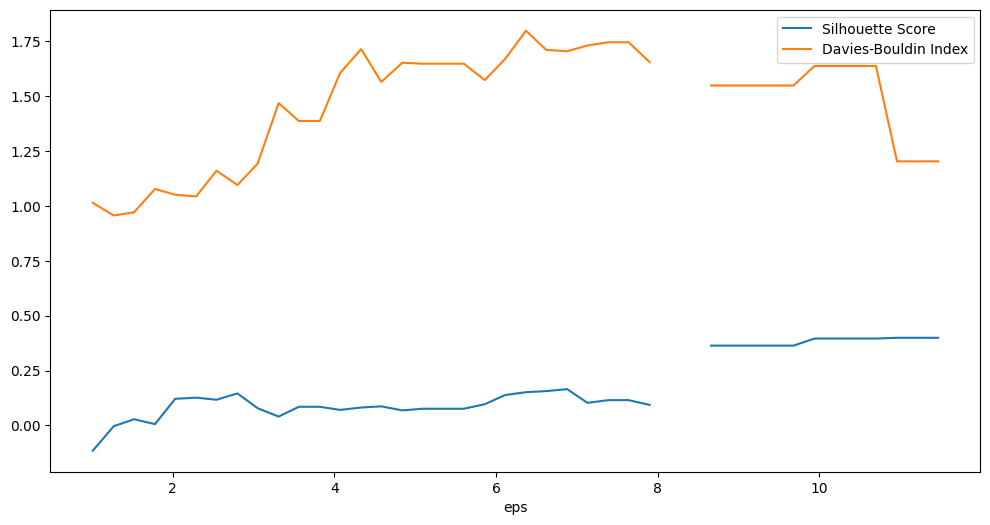

In [154]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

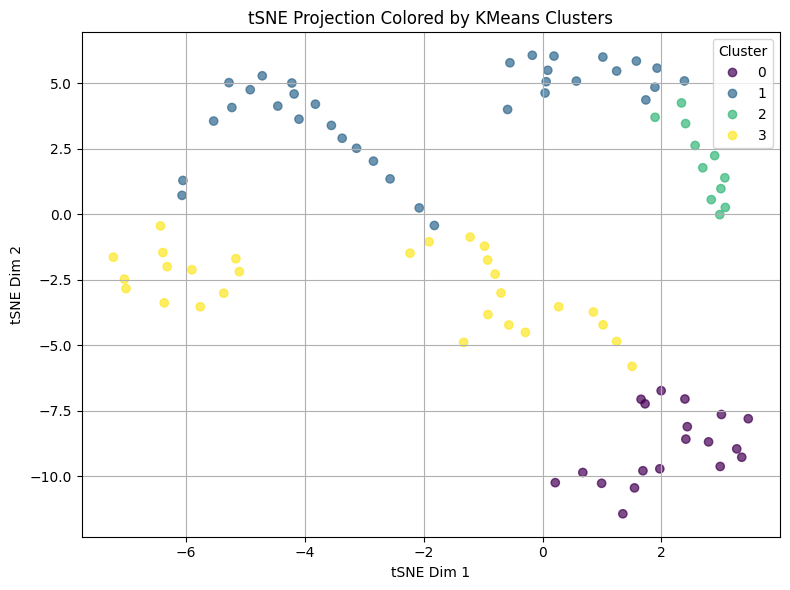

In [155]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        38    146          0.386221   
1    0.05            2        31    129          0.275274   
2    0.06            2        31    102          0.162500   
3    0.06            2        26     86          0.135227   
4    0.07            2        17     78         -0.125260   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.816445   
196  0.99            2         2      2          0.816445   
197  0.99            2         2      2          0.816445   
198  1.00            2         2      2          0.816445   
199  1.00            2         2      2          0.816445   

     Davies-Bouldin Index  
0                0.629451  
1                0.733809  
2                0.787914  
3                0.868222  
4                0.760738  
..                    ...  
195              0.220613  
196              0.220613  
197              0.220613  
198              0.220613  
199              0.220613  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

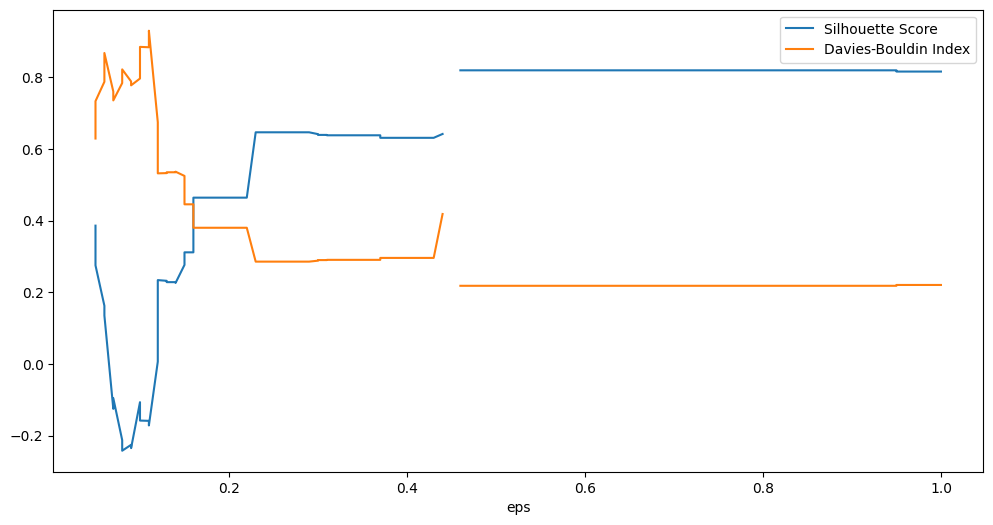

In [156]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [157]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [158]:
#Start with spring and work our way down to winter
season = 2
season_year = 2006
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2006-06-01 to 2006-08-31
Columns: 272 entries, 10000009 to 22000047
dtypes: float64(272)
memory usage: 196.2 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-06-01  0.593865  0.525148  0.381380  0.621227  0.469251  0.646078   
2006-06-02  0.566169  0.512365  0.366289  0.603479  0.448814  0.613672   
2006-06-03  0.573418  0.500772  0.362562  0.594574  0.452410  0.599263   
2006-06-04  0.562497  0.495947  0.367398  0.580432  0.447259  0.598805   
2006-06-05  0.545137  0.490949  0.373280  0.579952  0.433592  0.572884   
...              ...       ...       ...       ...       ...       ...   
2006-08-27  0.742664  1.370860  1.103610  0.677187  0.537774  0.385496   
2006-08-28  1.164308  1.552450  2.577175  0.661332  0.757640  0.380043   
2006-08-29  1.242737  1.514590  1.644405  0.796483  0.400140  0.382428   
2006-08-30  1.088052  1.407796  1.216303  1.057759  0.344359  0.383500   
2006-08-31  0.762093  1.298274  0.912381  0.871560  0.323060  0.382450   

            11000016  12000001  13000011  13000019  ...  64000025  66000014  \
2006-06-01  0.687193  0.442219  

          2006-06-01  2006-06-02  2006-06-03  2006-06-04  2006-06-05  \
10000009   -0.070285   -0.068758   -0.065907   -0.064289   -0.063537   
10000010   -0.075602   -0.072968   -0.071656   -0.069629   -0.067973   
10000011   -0.086726   -0.084397   -0.082594   -0.079943   -0.077607   
10000014   -0.068168   -0.065839   -0.064232   -0.062850   -0.060686   
10000016   -0.079927   -0.077940   -0.075483   -0.073535   -0.072669   
...              ...         ...         ...         ...         ...   
7000003    -0.074099   -0.073223   -0.074401   -0.075506   -0.076686   
8000001    -0.047167   -0.049682   -0.050462   -0.052213   -0.053473   
9000001    -0.023252   -0.022593   -0.022157   -0.021137   -0.016647   
9000015    -0.024822   -0.023875   -0.023250   -0.022067   -0.017719   
22000047   -0.115788   -0.112857   -0.109926   -0.108862   -0.104352   

          2006-06-06  2006-06-07  2006-06-08  2006-06-09  2006-06-10  ...  \
10000009   -0.061506   -0.059721   -0.057970   -0.056685  

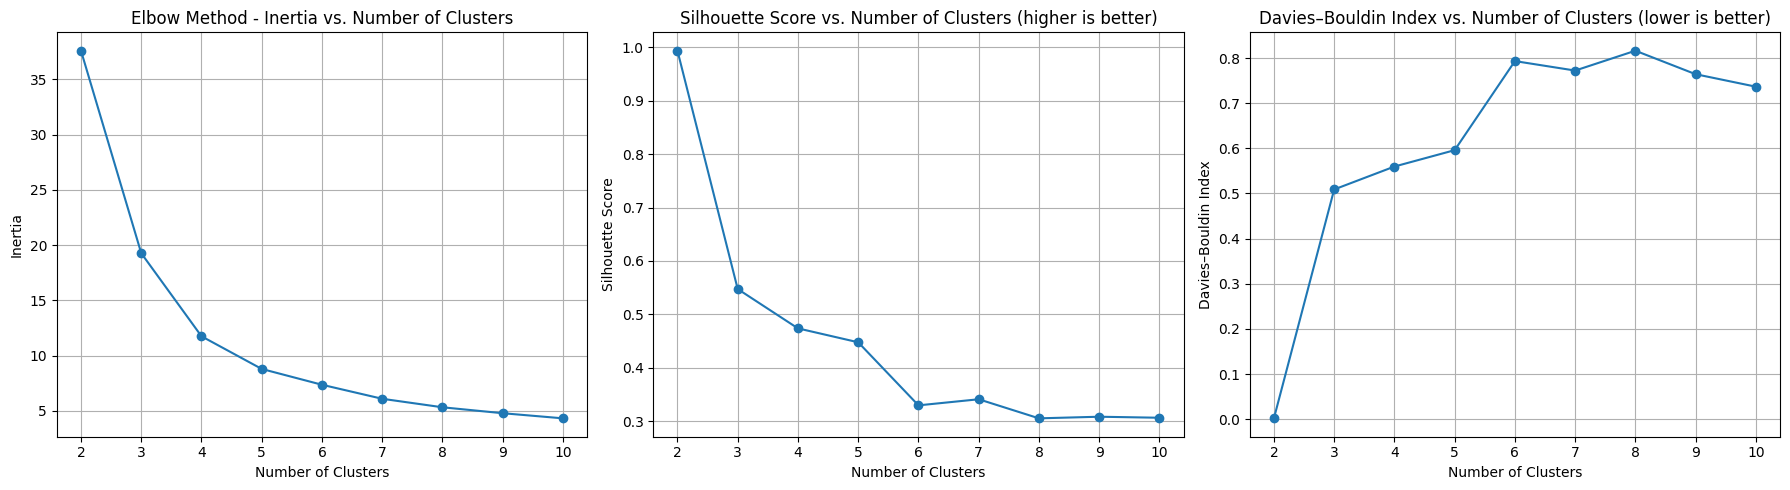

In [159]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        2
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-06-01  0.593865  0.525148  0.381380  0.621227  0.469251  0.646078   
2006-06-02  0.566169  0.512365  0.366289  0.603479  0.448814  0.613672   
2006-06-03  0.573418  0.500772  0.362562  0.594574  0.452410  0.599263   
2006-06-04  0.562497  0.495947  0.367398  0.580432  0.447259  0.598805   
2006-06-05  0.545137  0.490949  0.373280  0.579952  0.433592  0.572884   
...              ...       ...       ...       ...       ...       ...   
2006-08-27  0.742664  1.370860  1.103610  0.677187  0.537774  0.385496   
2006-08-28  1.164308  1.552450  2.577175  0.661332  0.757640  0.380043   
2006-08-29  1.242737  1.514590  1.644405  0.796483  0.400140  0.382428   
2006-08-30  1.088052  1.407796  1.216303  1.057759  0.344359  0.383500   
2006-08-31  0.762093  1.298274  0.912381  0.871560  0.323060  0.382450   

            11000016  12000001  13000011  13000019  ...  64000025  66000014  \
2006-06-01  0.687193  0.442219  

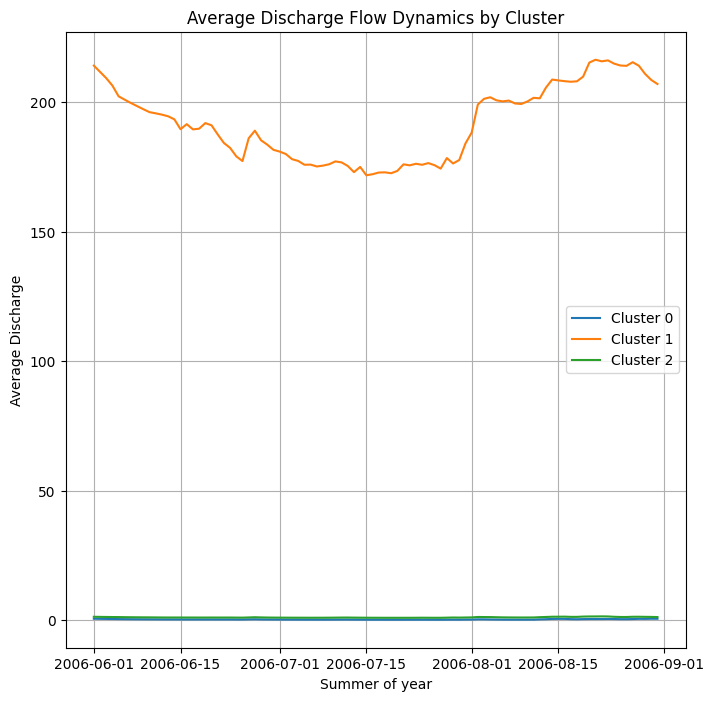

In [160]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [162]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2006-06-01  0.593865  0.525148  0.381380  0.621227  0.469251  0.646078   
2006-06-02  0.566169  0.512365  0.366289  0.603479  0.448814  0.613672   
2006-06-03  0.573418  0.500772  0.362562  0.594574  0.452410  0.599263   
2006-06-04  0.562497  0.495947  0.367398  0.580432  0.447259  0.598805   
2006-06-05  0.545137  0.490949  0.373280  0.579952  0.433592  0.572884   
...              ...       ...       ...       ...       ...       ...   
2006-08-27  0.742664  1.370860  1.103610  0.677187  0.537774  0.385496   
2006-08-28  1.164308  1.552450  2.577175  0.661332  0.757640  0.380043   
2006-08-29  1.242737  1.514590  1.644405  0.796483  0.400140  0.382428   
2006-08-30  1.088052  1.407796  1.216303  1.057759  0.344359  0.383500   
2006-08-31  0.762093  1.298274  0.912381  0.871560  0.323060  0.382450   

            11000016  12000001  13000011  13000019  ...  64000025  66000014  \
2006-06-01  0.687193  0.442219  0.443467  0.697277  ...  0.127272  0.226812   
2006-06-02  0.672927  0.442599  0.423213  0.666804  ...  0.104305  0.201762   
2006-06-03  0.667299  0.438289  0.418754  0.647157  ...  0.095579  0.196669   
2006-06-04  0.649984  0.431613  0.404471  0.622086  ...  0.095665  0.195971   
2006-06-05  0.636054  0.417807  0.385426  0.597921  ...  0.084185  0.176550   
...              ...       ...       ...       ...  ...       ...       ...   
2006-08-27  0.451375  0.471683  0.824963  0.628640  ...  0.303807  0.318419   
2006-08-28  0.535779  0.407790  0.861616  0.710147  ...  0.771918  0.501492   
2006-08-29  0.536937  0.369727  0.556827  0.666432  ...  0.519378  0.768303   
2006-08-30  0.515710  0.355104  0.425782  0.637690  ...  0.813778  1.160702   
2006-08-31  0.513898  0.353955  0.360260  0.607120  ...  0.701021  2.229260   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2006-06-01  0.105264  0.356326  0.545097  0.544567  0.892632  1.201712   
2006-06-02  0.095047  0.291227  0.521435  0.509101  0.809976  1.156189   
2006-06-03  0.082648  0.259829  0.492891  0.466086  0.768572  1.126230   
2006-06-04  0.076286  0.264423  0.475116  0.422698  0.712994  1.100280   
2006-06-05  0.066576  0.240043  0.441209  0.384536  0.668051  1.117849   
...              ...       ...       ...       ...       ...       ...   
2006-08-27  0.129296  1.255766  0.807481  0.802763  0.847464  0.826670   
2006-08-28  0.186423  2.939167  2.639276  1.674486  1.153060  1.011003   
2006-08-29  0.279508  4.089541  2.268814  1.746805  1.132903  1.011081   
2006-08-30  0.429025  5.516686  2.856687  1.496198  1.087184  0.981565   
2006-08-31  0.565803  9.695558  3.750149  1.224366  1.028899  0.956083   

             9000015  22000047  
2006-06-01  1.181425  0.005788  
2006-06-02  1.139805  0.002552  
2006-06-03  1.112415  0.017195  
2006-06-04  1.088690  0.006994  
2006-06-05  1.104753  0.046617  
...              ...       ...  
2006-08-27  0.838541  0.476431  
2006-08-28  1.007068  0.456990  
2006-08-29  1.007140  0.490548  
2006-08-30  0.980154  0.465121  
2006-08-31  0.956858  0.467979  

[92 rows x 272 columns]

<Axes: >

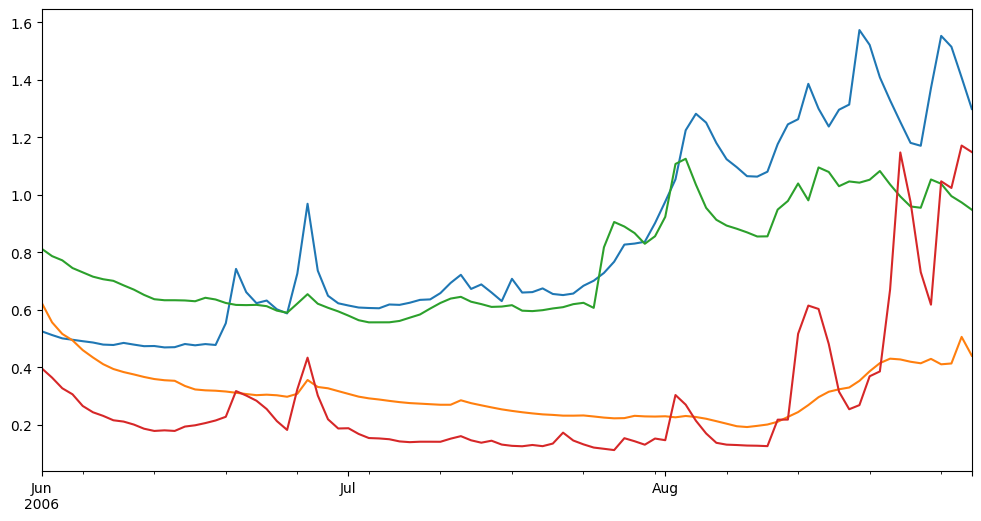

In [163]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

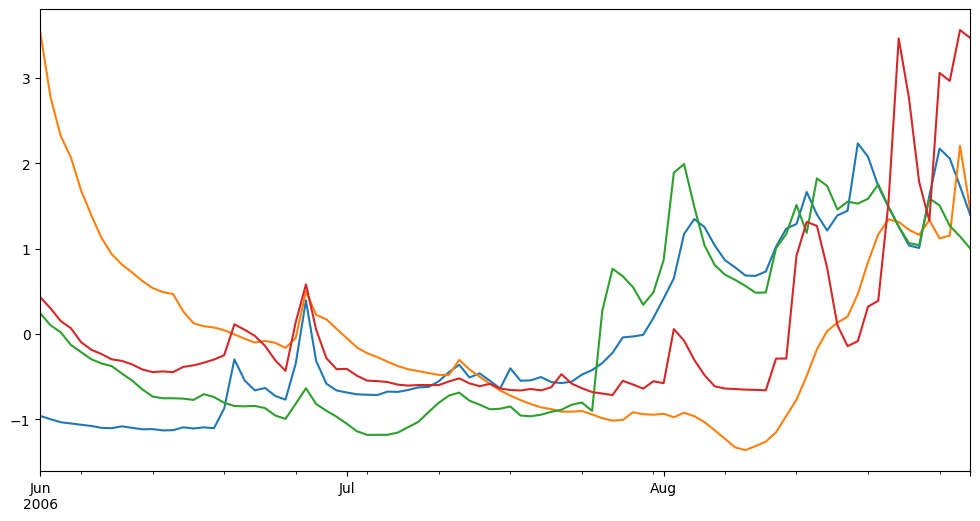

In [164]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

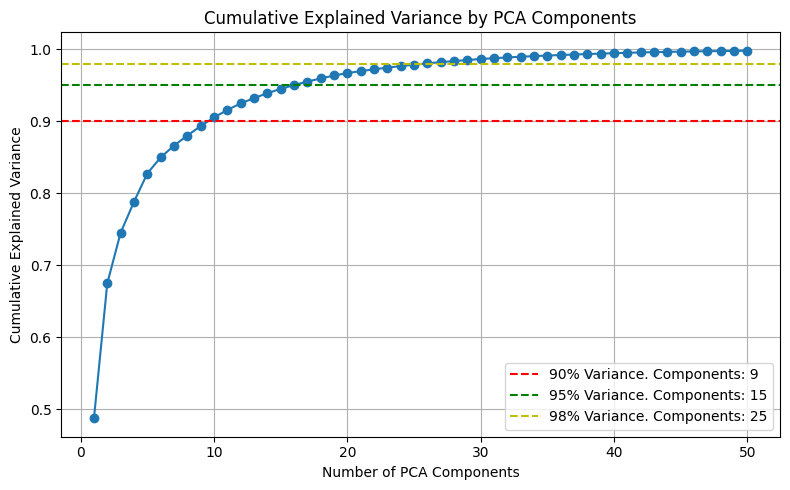

In [165]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[32.59360463, 18.71666071, -3.81259686, ..., -0.76414636,
        -0.40590628, -0.44200127],
       [26.78204558, 17.59168943, -2.20414479, ..., -0.24389209,
        -0.22094304, -0.06195656],
       [23.30605806, 16.43584986, -1.99848954, ...,  0.05326195,
         0.12146767, -0.14099315],
       ...,
       [14.62450503, -6.76711283, 11.19517044, ..., -0.07521114,
         1.80804905, -0.4617488 ],
       [17.72895834, -5.86079078, 21.0360868 , ...,  2.79643904,
         1.95264422,  0.40003513],
       [15.78645168, -4.753116  , 21.18299884, ..., -2.99231497,
        -2.44198155, -0.14138811]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


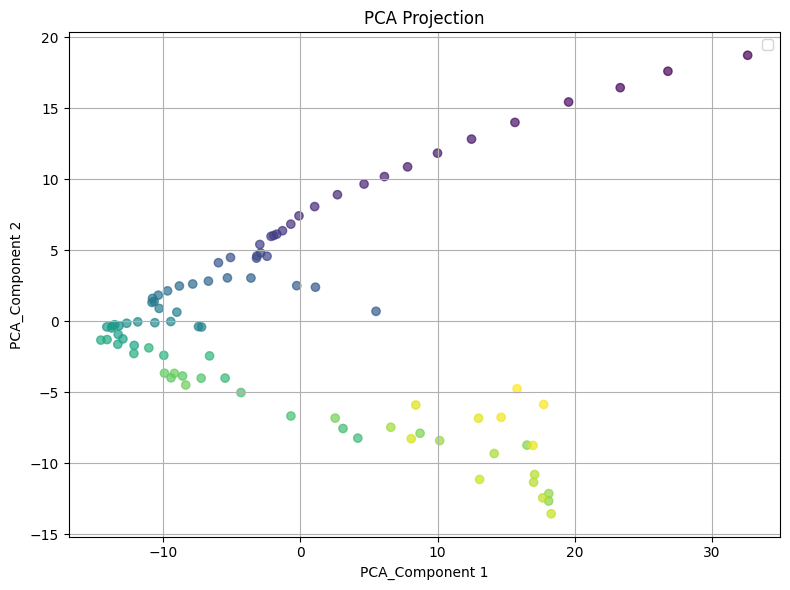

In [167]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


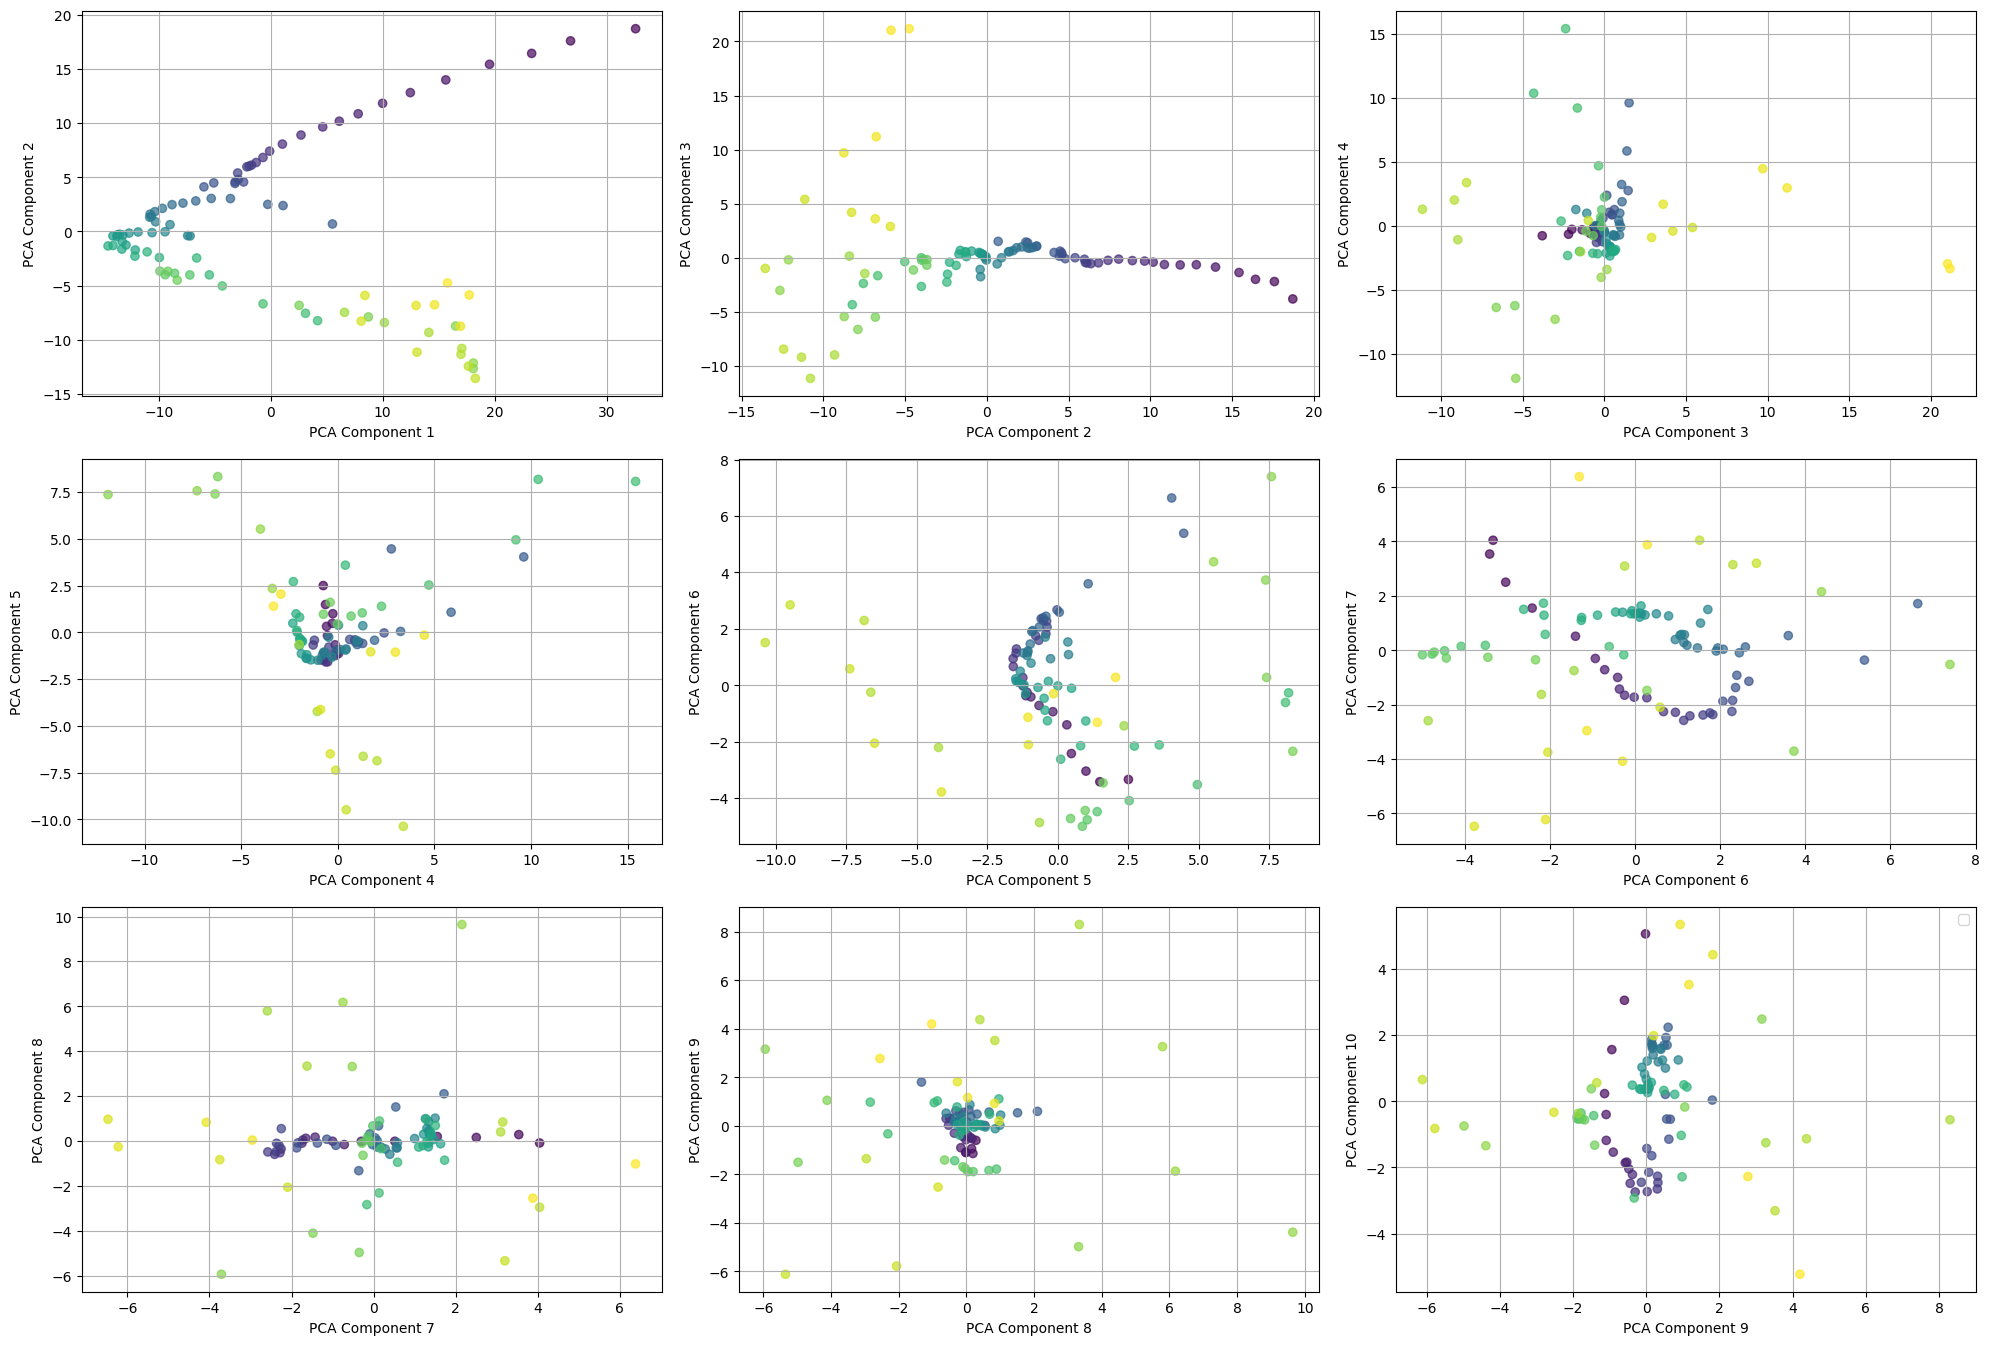

In [168]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [169]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.457
KMeans Davies-Bouldin Index is 1.345


<Axes: xlabel='k'>

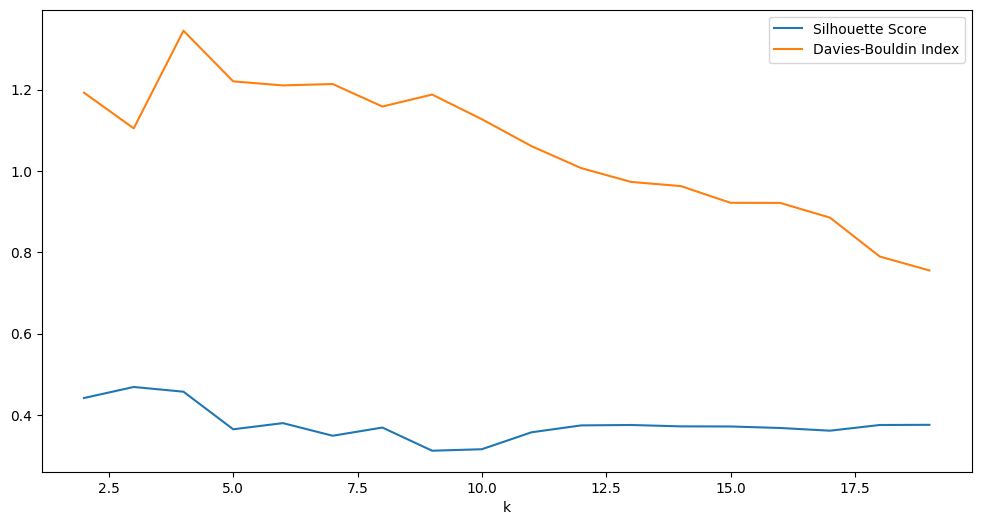

In [170]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         2     84         -0.189770   
2    1.01            3         2     81         -0.146216   
3    1.27            3         3     72         -0.155063   
4    1.52            3         5     64         -0.085808   
5    1.78            3         5     54          0.023544   
6    2.03            3         5     49          0.078322   
7    2.29            3         5     45          0.091956   
8    2.54            3         4     44          0.161541   
9    2.80            3         4     40          0.183124   
10   3.05            3         3     37          0.210389   
11   3.31            3         3     37          0.210389   
12   3.56            3         2     37          0.089416   
13   3.82            3         2     36          0.076617   
14   4.07            3         2     35          0.082376   
15   4.33            3         2     35          0.082376   
16   4.58            3         3     29          0.114563   
17   4.84            3         2     29          0.065762   
18   5.09            3         2     29          0.065762   
19   5.35            3         2     28          0.069087   
20   5.60            3         2     28          0.069087   
21   5.86            3         2     28          0.069087   
22   6.11            3         2     28          0.069087   
23   6.37            3         2     26          0.075347   
24   6.62            3         2     26          0.075347   
25   6.88            3         2     26          0.075347   
26   7.13            3         2     25          0.107746   
27   7.39            3         2     24          0.092000   
28   7.64            3         2     24          0.092000   
29   7.90            3         1     24               NaN   
30   8.15            3         1     24               NaN   
31   8.41            3         1     24               NaN   
32   8.66            3         1     24               NaN   
33   8.92            3         1     24               NaN   
34   9.17            3         1     24               NaN   
35   9.43            3         2     20          0.305099   
36   9.68            3         2     19          0.305258   
37   9.94            3         2     19          0.305258   
38  10.19            3         2     19          0.305258   
39  10.45            3         2     19          0.305258   
40  10.70            3         2     19          0.305258   
41  10.96            3         2     19          0.305258   
42  11.21            3         2     19          0.305258   
43  11.47            3         2     18          0.309740   
44  11.72            3         2     16          0.304975   
45  11.98            3         2     16          0.304975   
46  12.23            3         2     16          0.304975   
47  12.49            3         2     16          0.304975   
48  12.74            3         2     16          0.304975   
49  13.00            3         2     14          0.343356   

    Davies-Bouldin Index  
0                    NaN  
1               1.180977  
2               1.163804  
3               1.505365  
4               1.489417  
5               1.354819  
6               1.322429  
7               1.355473  
8               1.350445  
9               1.303672  
10              1.358980  
11              1.358980  
12              1.366637  
13              1.397030  
14              1.345568  
15              1.345568  
16              1.125984  
17              1.369082  
18              1.369082  
19              1.349214  
20              1.349214  
21              1.349214  
22              1.349214  
23              1.297602  
24              1.297602  
25              1.297602  
26              1.322072  
27              1.345154  
28              1.345154  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

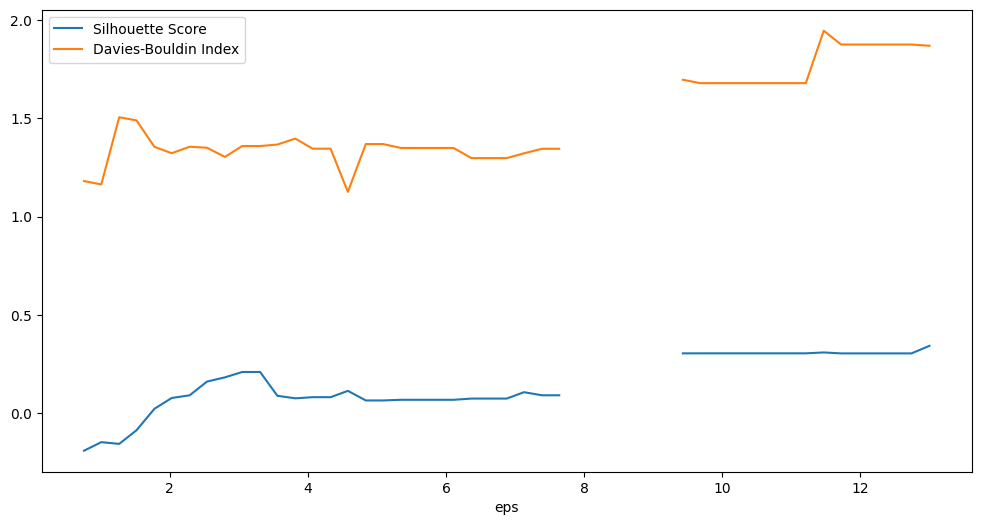

In [171]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

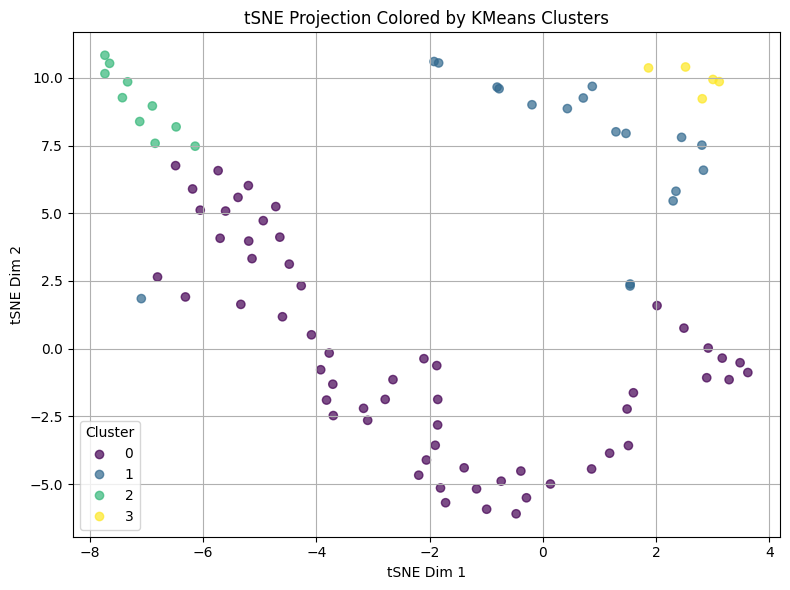

In [172]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        16     85         -0.048820              0.923157
1   0.07            2         7     46         -0.047674              0.815472
2   0.09            2         4     33         -0.038860              0.815397
3   0.11            2         3     26         -0.014758              0.983706
4   0.13            2         3     16          0.364817              0.530976
5   0.15            2         2     12          0.353286              0.701604
6   0.17            2         1     10               NaN                   NaN
7   0.19            2         1     10               NaN                   NaN
8   0.21            2         2      7          0.265392              0.917950
9   0.22            2         1      7               NaN                   NaN
10  0.24            2         2      5          0.742438              0.246230
11  0.26            2         2      4          0.741008              0.247330
12  0.28            2         2      4          0.741008              0.247330
13  0.30            2         2      4          0.741008              0.247330
14  0.32            2         2      4          0.741008              0.247330
15  0.34            2         1      4               NaN                   NaN
16  0.36            2         2      2          0.814319              0.204784
17  0.38            2         2      2          0.814319              0.204784
18  0.40            2         2      2          0.814319              0.204784
19  0.42            2         2      2          0.814319              0.204784
20  0.44            2         2      2          0.814319              0.204784
21  0.46            2         2      2          0.814319              0.204784
22  0.48            2         2      2          0.814319              0.204784
23  0.50            2         2      2          0.814319              0.204784
24  0.52            2         2      2          0.814319              0.204784
25  0.53            2         1      2               NaN                   NaN
26  0.55            2         1      2               NaN                   NaN
27  0.57            2         1      1               NaN                   NaN
28  0.59            2         1      1               NaN                   NaN
29  0.61            2         1      1               NaN                   NaN
30  0.63            2         1      1               NaN                   NaN
31  0.65            2         1      1               NaN                   NaN
32  0.67            2         1      1               NaN                   NaN
33  0.69            2         1      1               NaN                   NaN
34  0.71            2         1      1               NaN                   NaN
35  0.73            2         1      1               NaN                   NaN
36  0.75            2         1      1               NaN                   NaN
37  0.77            2         1      1               NaN                   NaN
38  0.79            2         1      1               NaN                   NaN
39  0.81            2         1      1               NaN                   NaN
40  0.83            2         1      1               NaN                   NaN
41  0.84            2         1      1               NaN                   NaN
42  0.86            2         1      1               NaN                   NaN
43  0.88            2         1      1               NaN                   NaN
44  0.90            2         1      1               NaN                   NaN
45  0.92            2         1      1               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

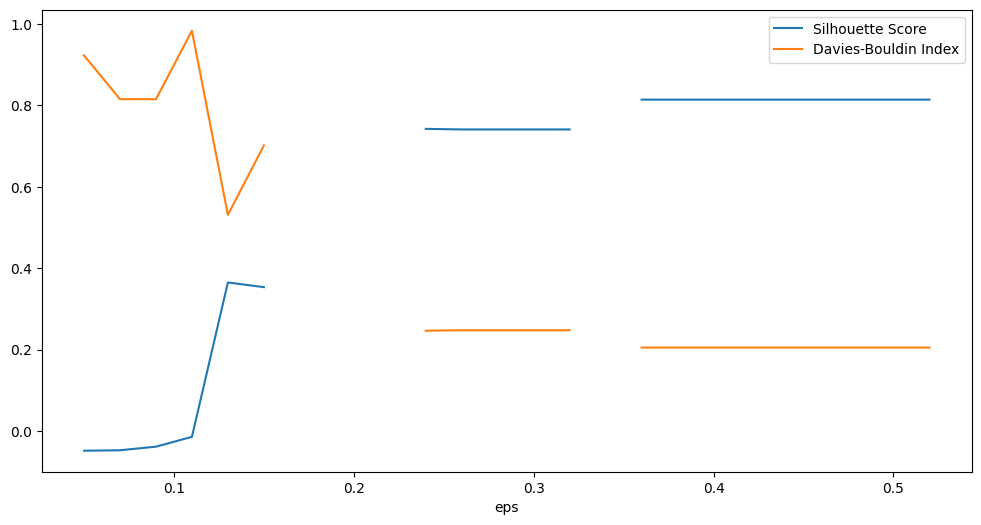

In [173]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [174]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [175]:
#Start with spring and work our way down to winter
season = 3
season_year = 2006
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2006-09-01 to 2006-11-30
Columns: 274 entries, 10000009 to 26000084
dtypes: float64(274)
memory usage: 195.5 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-09-01  0.655984  1.232042  0.743419  0.744612  0.339250  0.389036   
2006-09-02  0.693278  1.174855  0.948970  0.688269  0.374594  0.400876   
2006-09-03  0.760674  1.182425  0.976596  0.742908  0.417970  0.432824   
2006-09-04  0.788225  1.179137  0.955006  0.800934  0.461262  0.446011   
2006-09-05  0.761451  1.388711  0.947214  0.789062  0.419126  0.462493   
...              ...       ...       ...       ...       ...       ...   
2006-11-26  1.498631  0.905022  1.561433  1.296319  0.906985  2.686563   
2006-11-27  1.337524  1.110383  1.892673  1.527499  1.344131  2.750179   
2006-11-28  1.129131  0.902432  1.485822  1.319810  0.883626  2.723607   
2006-11-29  1.029012  0.757476  1.247810  1.175541  0.792963  2.684357   
2006-11-30  0.960943  0.694584  1.073489  1.106593  0.741913  2.599258   

            11000016  12000001  13000011  13000019  ...  66000014  67000017  \
2006-09-01  0.540226  0.386904  

          2006-09-01  2006-09-02  2006-09-03  2006-09-04  2006-09-05  \
10000009   -0.059281   -0.056903   -0.058110   -0.055781   -0.051866   
10000010   -0.013276   -0.018582   -0.024640   -0.024902   -0.001920   
10000011   -0.052298   -0.036557   -0.040974   -0.042607   -0.037075   
10000014   -0.052203   -0.057301   -0.059520   -0.054777   -0.049668   
10000016   -0.084575   -0.082262   -0.085307   -0.081609   -0.079124   
...              ...         ...         ...         ...         ...   
8000001    -0.036008   -0.040038   -0.046381   -0.046798   -0.042762   
9000001    -0.035633   -0.030510   -0.023770   -0.022403   -0.021023   
9000015    -0.035544   -0.030919   -0.025323   -0.024067   -0.022277   
22000047   -0.070234   -0.073358   -0.075687   -0.080061   -0.076988   
26000084   -0.059212   -0.063549   -0.072109   -0.075955   -0.074803   

          2006-09-06  2006-09-07  2006-09-08  2006-09-09  2006-09-10  ...  \
10000009   -0.046829   -0.051097   -0.053335   -0.050284  

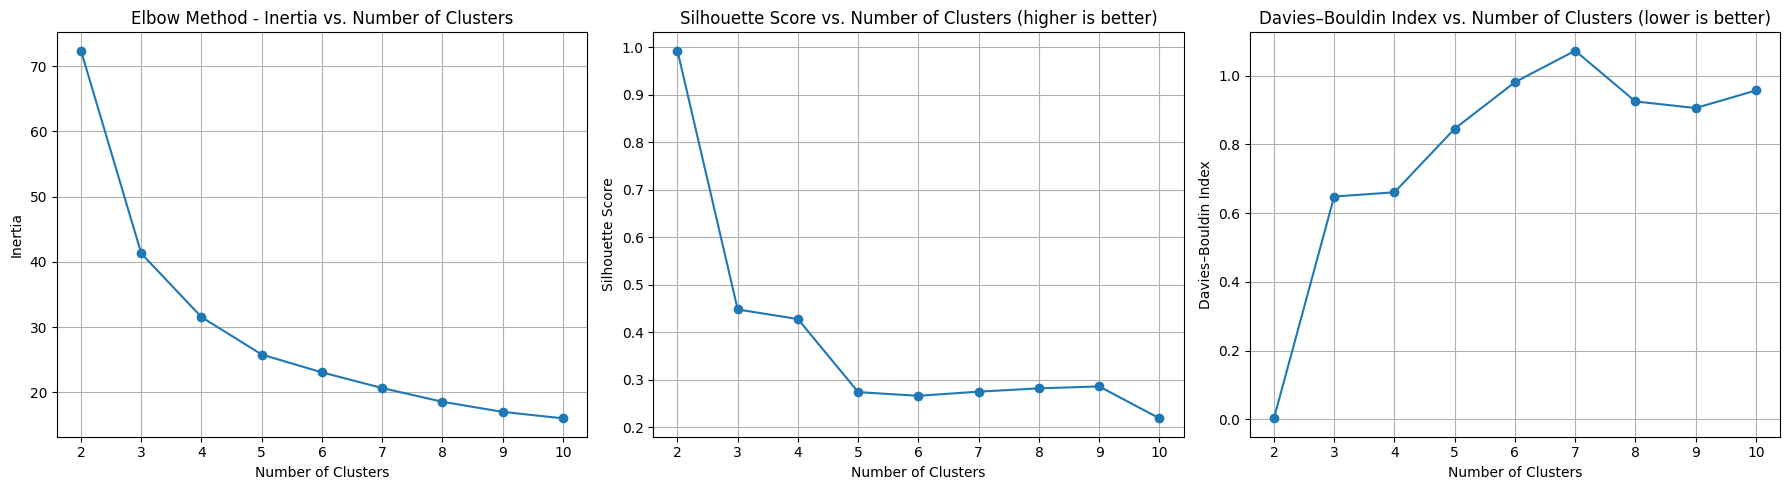

In [176]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-09-01  0.655984  1.232042  0.743419  0.744612  0.339250  0.389036   
2006-09-02  0.693278  1.174855  0.948970  0.688269  0.374594  0.400876   
2006-09-03  0.760674  1.182425  0.976596  0.742908  0.417970  0.432824   
2006-09-04  0.788225  1.179137  0.955006  0.800934  0.461262  0.446011   
2006-09-05  0.761451  1.388711  0.947214  0.789062  0.419126  0.462493   
...              ...       ...       ...       ...       ...       ...   
2006-11-26  1.498631  0.905022  1.561433  1.296319  0.906985  2.686563   
2006-11-27  1.337524  1.110383  1.892673  1.527499  1.344131  2.750179   
2006-11-28  1.129131  0.902432  1.485822  1.319810  0.883626  2.723607   
2006-11-29  1.029012  0.757476  1.247810  1.175541  0.792963  2.684357   
2006-11-30  0.960943  0.694584  1.073489  1.106593  0.741913  2.599258   

            11000016  12000001  13000011  13000019  ...  66000014  67000017  \
2006-09-01  0.540226  0.386904  

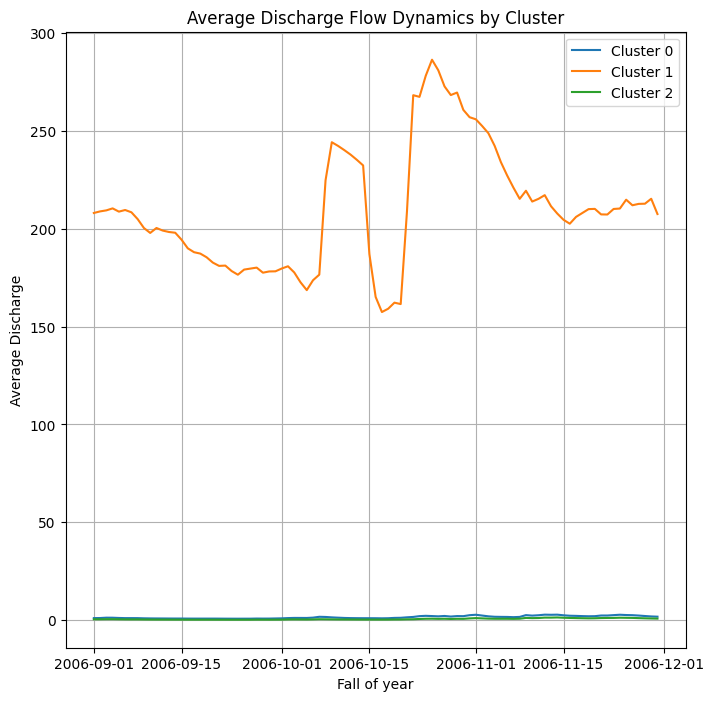

In [177]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [178]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [179]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2006-09-01  0.655984  1.232042  0.743419  0.744612  0.339250  0.389036   
2006-09-02  0.693278  1.174855  0.948970  0.688269  0.374594  0.400876   
2006-09-03  0.760674  1.182425  0.976596  0.742908  0.417970  0.432824   
2006-09-04  0.788225  1.179137  0.955006  0.800934  0.461262  0.446011   
2006-09-05  0.761451  1.388711  0.947214  0.789062  0.419126  0.462493   
...              ...       ...       ...       ...       ...       ...   
2006-11-26  1.498631  0.905022  1.561433  1.296319  0.906985  2.686563   
2006-11-27  1.337524  1.110383  1.892673  1.527499  1.344131  2.750179   
2006-11-28  1.129131  0.902432  1.485822  1.319810  0.883626  2.723607   
2006-11-29  1.029012  0.757476  1.247810  1.175541  0.792963  2.684357   
2006-11-30  0.960943  0.694584  1.073489  1.106593  0.741913  2.599258   

            11000016  12000001  13000011  13000019  ...  66000014  67000017  \
2006-09-01  0.540226  0.386904  0.389356  0.602023  ...  1.927593  0.578801   
2006-09-02  0.604545  0.418371  0.435909  0.660116  ...  1.655005  0.549187   
2006-09-03  0.780546  0.566273  0.497880  0.772870  ...  2.303065  0.690804   
2006-09-04  0.799266  0.456129  0.516622  0.764005  ...  2.328416  1.345695   
2006-09-05  0.731602  0.438455  0.462209  0.751432  ...  1.612373  0.774860   
...              ...       ...       ...       ...  ...       ...       ...   
2006-11-26  3.327459  1.280420  1.210540  1.843883  ...  2.179493  0.855124   
2006-11-27  3.005999  1.165874  1.155825  2.130813  ...  1.867097  0.621638   
2006-11-28  2.770740  0.987536  1.036191  1.479428  ...  1.628801  0.508010   
2006-11-29  2.607352  0.924131  0.960769  1.256506  ...  1.432987  0.419901   
2006-11-30  2.421460  0.878611  0.820126  1.137793  ...  1.246125  0.335157   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2006-09-01  6.057841  3.392855  1.002683  0.947400  0.952101  0.953217   
2006-09-02  4.359064  3.115717  1.064725  0.905216  1.024954  1.019823   
2006-09-03  7.139008  4.412981  1.239935  0.908468  1.193383  1.173810   
2006-09-04  5.565561  4.963527  1.304980  0.901946  1.210770  1.189706   
2006-09-05  3.344166  3.599566  1.149485  0.875784  1.148797  1.133047   
...              ...       ...       ...       ...       ...       ...   
2006-11-26  2.523580  4.561664  2.750085  2.318193  3.117163  2.932634   
2006-11-27  1.945001  4.070060  2.835301  2.471696  3.058964  2.879425   
2006-11-28  1.578955  3.844800  2.553151  2.228396  2.670127  2.523929   
2006-11-29  1.306162  3.606837  2.174289  1.926053  2.427022  2.301669   
2006-11-30  1.131546  3.341124  1.805089  1.710220  2.337380  2.219714   

            22000047  26000084  
2006-09-01  0.518829  0.656849  
2006-09-02  0.486487  0.609761  
2006-09-03  0.539183  0.584269  
2006-09-04  0.480864  0.532840  
2006-09-05  0.445957  0.473397  
...              ...       ...  
2006-11-26  0.605212  1.202981  
2006-11-27  0.599672  1.209893  
2006-11-28  0.524981  1.200145  
2006-11-29  0.583607  1.173307  
2006-11-30  0.602342  1.135894  

[91 rows x 274 columns]

<Axes: >

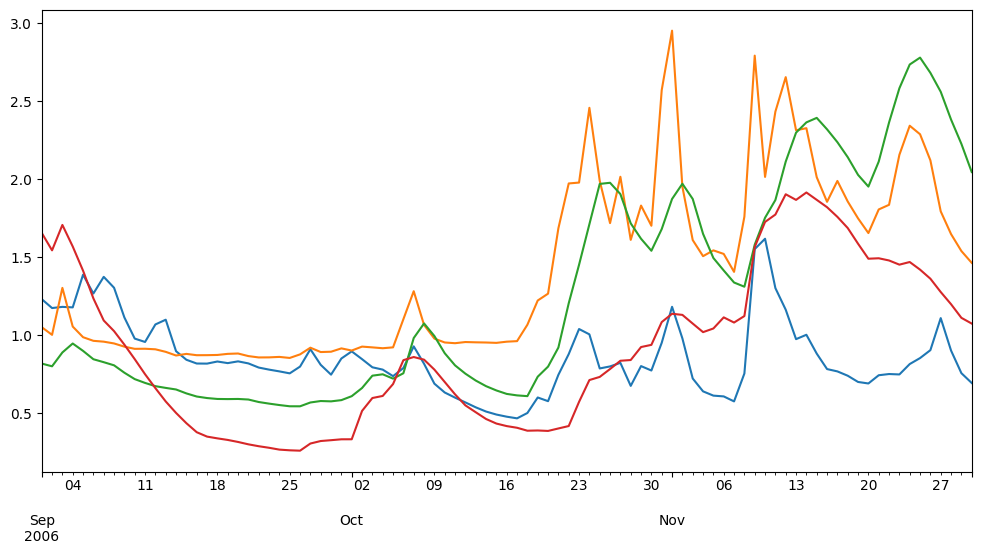

In [180]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

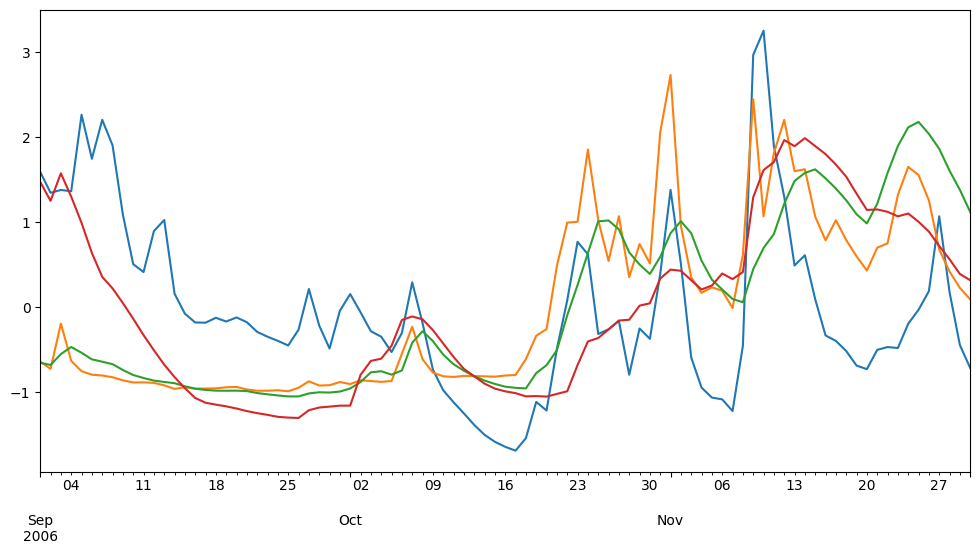

In [181]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

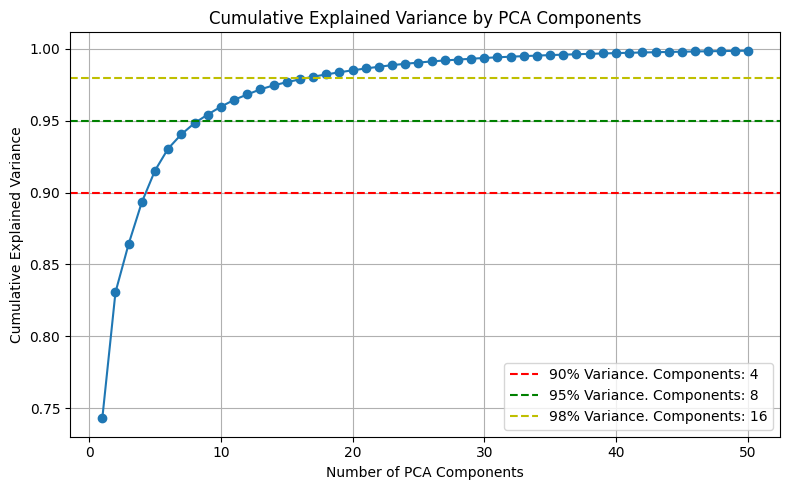

In [182]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-7.93175636,  2.81690168,  4.96024539, ..., -0.0991932 ,
        -0.88583876, -0.06862734],
       [-7.62268702,  2.32049249,  4.27657711, ...,  0.48776347,
        -0.32431072, -0.51487501],
       [-5.79228931,  1.36934209,  6.7309823 , ...,  0.47966717,
        -0.35021   , -0.02118115],
       ...,
       [15.34802892,  6.4983656 ,  0.69331671, ..., -0.16674135,
         0.34030819, -0.12001607],
       [11.98658499,  6.71219204,  0.62646145, ..., -0.10097605,
        -0.67127451, -0.96622024],
       [ 9.2863163 ,  6.33960264,  0.39592754, ..., -0.33938577,
        -0.34200972, -1.31421302]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


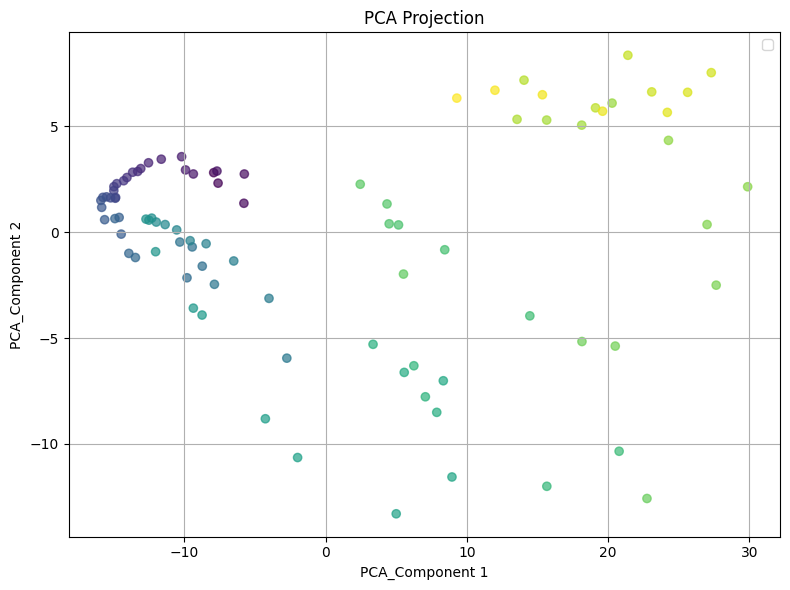

In [184]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


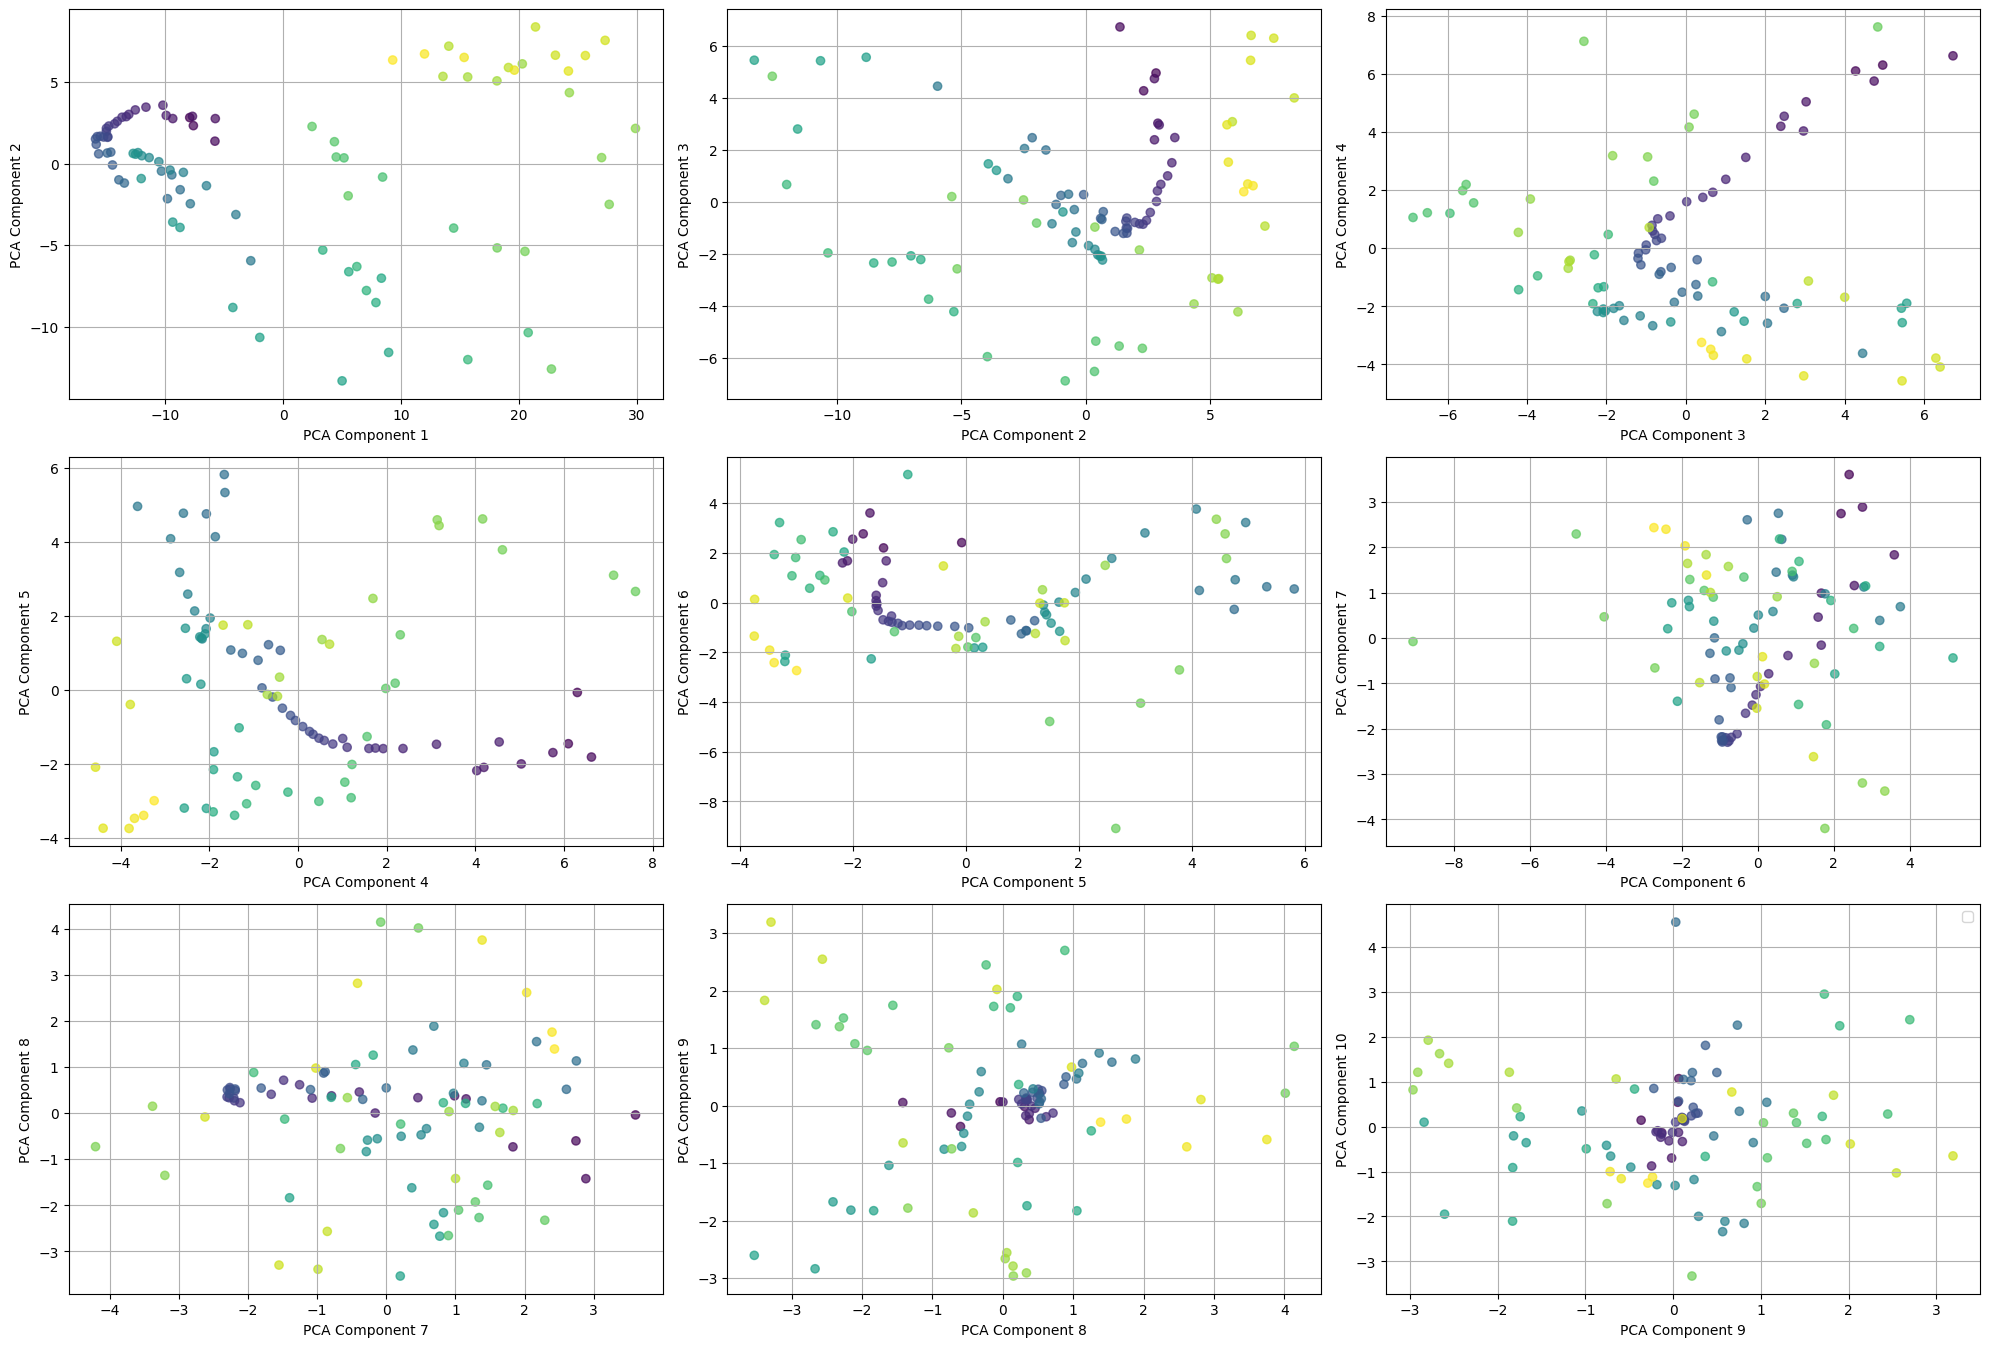

In [185]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [186]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.332
KMeans Davies-Bouldin Index is 1.275


<Axes: xlabel='k'>

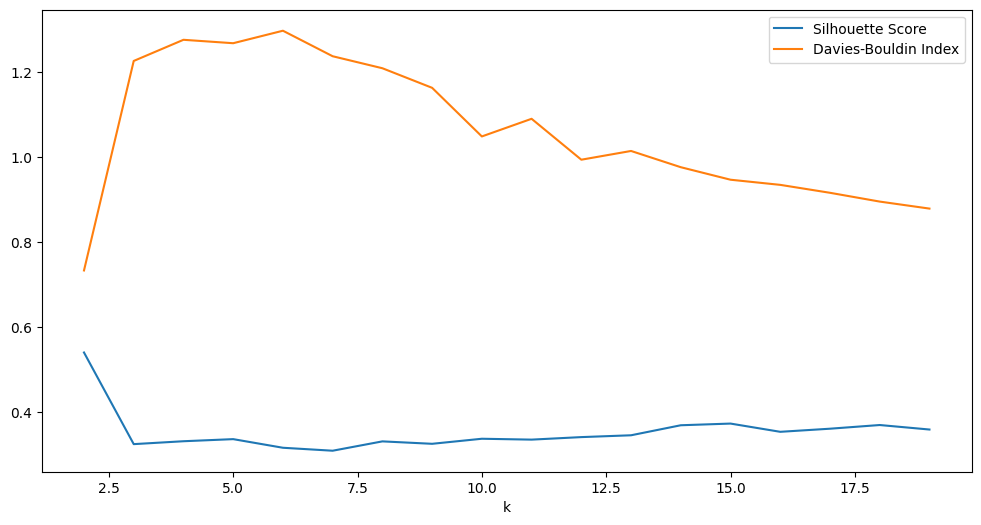

In [187]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         2     84         -0.117536   
1    0.76            3         2     79         -0.059360   
2    1.01            3         2     75         -0.012018   
3    1.27            3         2     72          0.019880   
4    1.52            3         2     68          0.070433   
5    1.78            3         2     64          0.110990   
6    2.03            3         2     64          0.110990   
7    2.29            3         2     64          0.110990   
8    2.54            3         2     63          0.122411   
9    2.80            3         4     55          0.014366   
10   3.05            3         5     51         -0.021884   
11   3.31            3         4     47          0.001989   
12   3.56            3         4     45         -0.003414   
13   3.82            3         5     39          0.038473   
14   4.07            3         6     36          0.060547   
15   4.33            3         5     34          0.054553   
16   4.58            3         5     29          0.262348   
17   4.84            3         6     25          0.291445   
18   5.09            3         6     22          0.329092   
19   5.35            3         6     20          0.350995   
20   5.60            3         7     16          0.378828   
21   5.86            3         7     16          0.378828   
22   6.11            3         7     13          0.386327   
23   6.37            3         7     12          0.386739   
24   6.62            3         7     12          0.386739   
25   6.88            3         7     12          0.386739   
26   7.13            3         6     11          0.391456   
27   7.39            3         6     11          0.391456   
28   7.64            3         6     11          0.391456   
29   7.90            3         6     10          0.397271   
30   8.15            3         4      8          0.425142   
31   8.41            3         4      8          0.425142   
32   8.66            3         4      5          0.428088   
33   8.92            3         3      5          0.457584   
34   9.17            3         2      5          0.450981   
35   9.43            3         2      5          0.450981   
36   9.68            3         2      5          0.450981   
37   9.94            3         2      5          0.450981   
38  10.19            3         2      5          0.450981   
39  10.45            3         2      3          0.449268   
40  10.70            3         2      3          0.449268   
41  10.96            3         2      3          0.449268   
42  11.21            3         2      1          0.448137   
43  11.47            3         1      1               NaN   
44  11.72            3         1      1               NaN   
45  11.98            3         1      1               NaN   
46  12.23            3         1      1               NaN   
47  12.49            3         1      1               NaN   
48  12.74            3         1      1               NaN   
49  13.00            3         1      1               NaN   

    Davies-Bouldin Index  
0               0.941820  
1               0.967365  
2               0.939787  
3               0.951896  
4               0.960846  
5               0.903164  
6               0.903164  
7               0.903164  
8               0.918010  
9               1.366463  
10              1.378015  
11              1.467700  
12              1.497484  
13              1.344553  
14              1.357421  
15              1.408259  
16              1.506744  
17              1.447117  
18              1.274177  
19              1.300277  
20              1.279700  
21              1.279700  
22              1.333462  
23              1.278458  
24              1.278458  
25              1.278458  
26              1.302570  
27              1.302570  
28              1.302570  
29              1.282009  
30              1.422874  
31              1.422874  
32 

<Axes: xlabel='eps'>

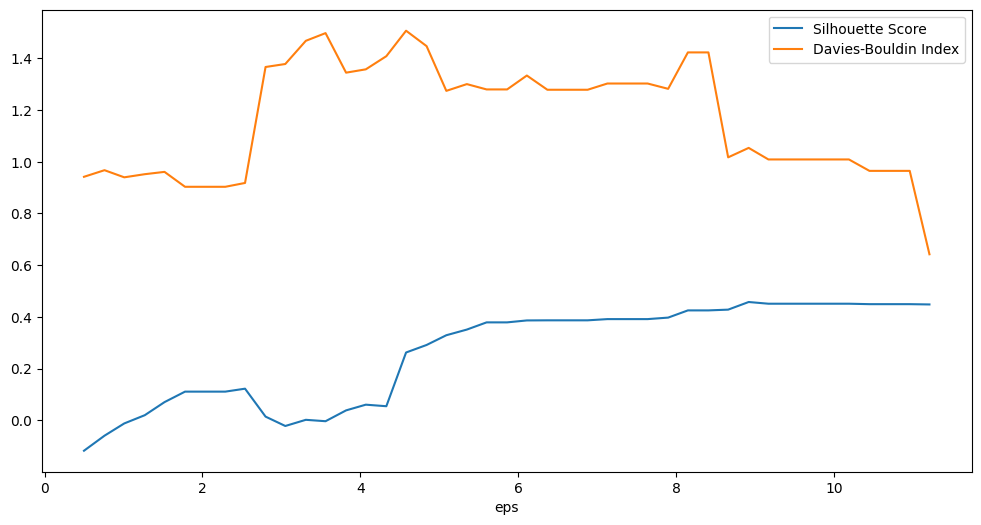

In [188]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

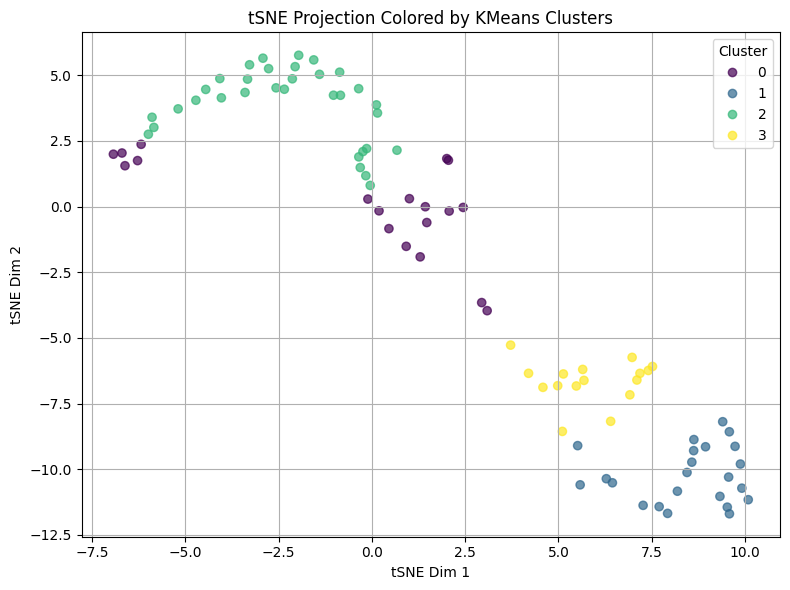

In [189]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        25    190          0.423283              0.510804
1   0.07            2        28    128          0.263573              0.639049
2   0.09            2        22     92          0.168841              0.559115
3   0.11            2        16     66          0.138663              0.586030
4   0.13            2        11     45          0.113119              0.773723
5   0.15            2         5     31          0.344100              0.442855
6   0.17            2         5     25          0.322005              0.458266
7   0.19            2         3     21          0.396193              0.424167
8   0.21            2         4     17          0.377801              0.427862
9   0.22            2         5     12          0.303959              0.494461
10  0.24            2         5     12          0.303959              0.494461
11  0.26            2         3     11          0.429027              0.478940
12  0.28            2         3     10          0.425246              0.481838
13  0.30            2         3     10          0.425246              0.481838
14  0.32            2         2      9          0.564375              0.350999
15  0.34            2         2      9          0.564375              0.350999
16  0.36            2         2      9          0.564375              0.350999
17  0.38            2         2      9          0.564375              0.350999
18  0.40            2         2      9          0.564375              0.350999
19  0.42            2         2      9          0.564375              0.350999
20  0.44            2         2      7          0.556500              0.357781
21  0.46            2         2      7          0.556500              0.357781
22  0.48            2         3      5          0.557456              0.317774
23  0.50            2         3      5          0.557456              0.317774
24  0.52            2         2      5          0.783001              0.241485
25  0.53            2         3      3          0.580996              0.439773
26  0.55            2         3      3          0.580996              0.439773
27  0.57            2         3      3          0.580996              0.439773
28  0.59            2         3      3          0.580996              0.439773
29  0.61            2         3      2          0.574874              0.444428
30  0.63            2         3      2          0.574874              0.444428
31  0.65            2         3      2          0.574874              0.444428
32  0.67            2         3      2          0.574874              0.444428
33  0.69            2         3      2          0.574874              0.444428
34  0.71            2         3      2          0.574874              0.444428
35  0.73            2         3      2          0.574874              0.444428
36  0.75            2         3      2          0.574874              0.444428
37  0.77            2         2      2          0.772719              0.247226
38  0.79            2         2      2          0.772719              0.247226
39  0.81            2         2      2          0.772719              0.247226
40  0.83            2         2      1          0.766600              0.250510
41  0.84            2         2      1          0.766600              0.250510
42  0.86            2         2      1          0.766600              0.250510
43  0.88            2         1      1               NaN                   NaN
44  0.90            2         1      1               NaN                   NaN
45  0.92            2         1      1               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

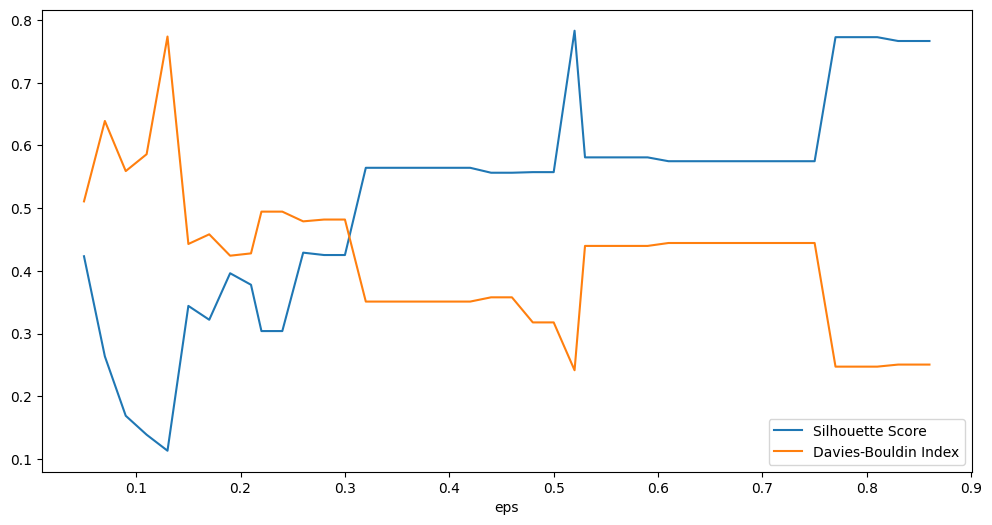

In [190]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [191]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [192]:
season = 4
season_year = 2006
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2006-12-01 to 2007-02-28
Columns: 265 entries, 10000009 to 9000015
dtypes: float64(265)
memory usage: 187.0 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-12-01  0.919159  0.652478  0.996123  1.062599  0.709007  2.525234   
2006-12-02  1.063660  0.763993  1.318986  1.195877  0.920105  2.511992   
2006-12-03  1.479370  0.848767  1.503716  1.319508  0.901729  2.487183   
2006-12-04  1.633382  0.952014  1.696054  1.379615  1.035705  2.505929   
2006-12-05  1.756617  0.901880  1.576894  1.356523  0.914197  2.569483   
...              ...       ...       ...       ...       ...       ...   
2007-02-24  1.342607  2.449185  5.715563  2.333599  1.104293  1.672102   
2007-02-25  1.481022  2.558517  5.863305  1.764384  1.414621  1.744802   
2007-02-26  2.122044  2.565146  6.248782  1.872029  2.138933  1.802962   
2007-02-27  2.932456  2.206041  5.881260  2.078676  2.269516  1.888080   
2007-02-28  3.270147  2.041180  5.335969  2.155139  3.315322  2.195252   

            11000016  12000001  13000011  13000019  ...  63000007  64000025  \
2006-12-01  2.249338  0.851041  

          2006-12-01  2006-12-02  2006-12-03  2006-12-04  2006-12-05  \
10000009   -0.072484   -0.074844   -0.069761   -0.066285   -0.061349   
10000010   -0.093839   -0.097729   -0.116280   -0.115989   -0.126060   
10000011   -0.066322   -0.055344   -0.067965   -0.061713   -0.074956   
10000014   -0.060998   -0.064746   -0.081554   -0.084796   -0.091640   
10000016   -0.089312   -0.085807   -0.112373   -0.109884   -0.125127   
...              ...         ...         ...         ...         ...   
67000019    0.093832    0.057058    0.006719   -0.006453    0.030433   
7000003    -0.019912    0.006124    0.015943    0.006814   -0.003507   
8000001    -0.021599   -0.016593   -0.015776   -0.017606   -0.029002   
9000001     0.030516    0.015841   -0.000582    0.016509    0.047617   
9000015     0.022000    0.007420   -0.009767    0.005229    0.033136   

          2006-12-06  2006-12-07  2006-12-08  2006-12-09  2006-12-10  ...  \
10000009   -0.085640   -0.094866   -0.108073   -0.061840  

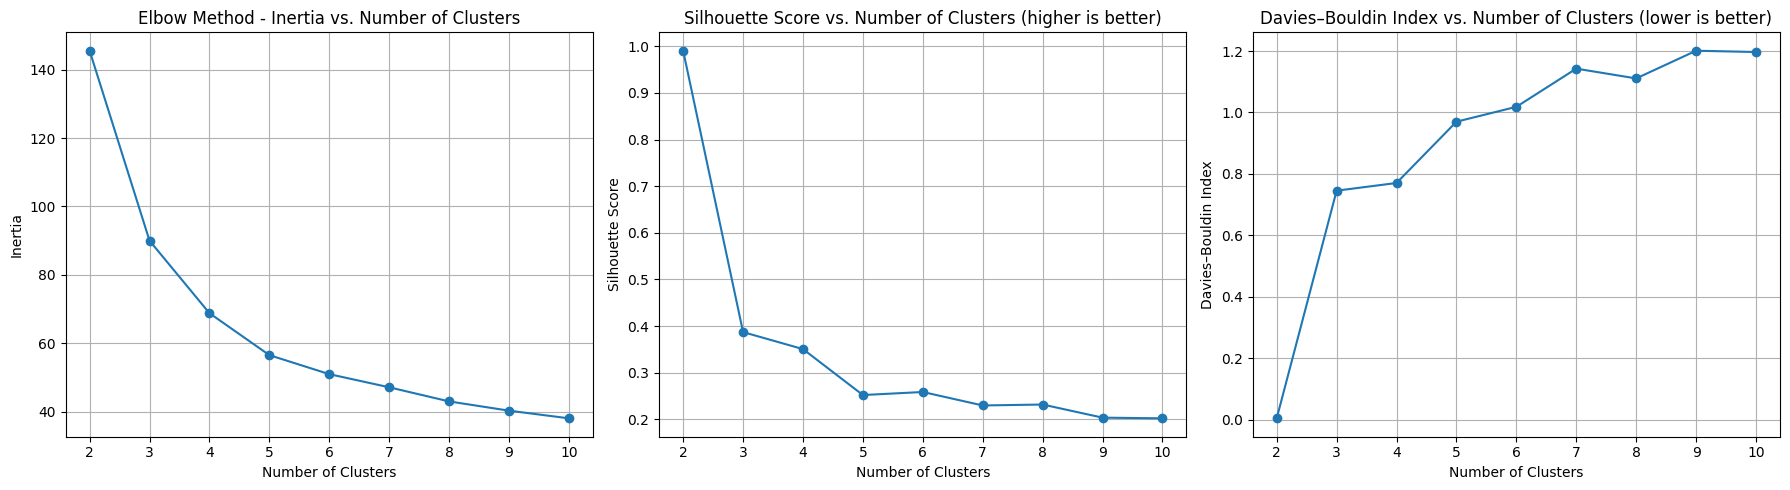

In [193]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2006-12-01  0.919159  0.652478  0.996123  1.062599  0.709007  2.525234   
2006-12-02  1.063660  0.763993  1.318986  1.195877  0.920105  2.511992   
2006-12-03  1.479370  0.848767  1.503716  1.319508  0.901729  2.487183   
2006-12-04  1.633382  0.952014  1.696054  1.379615  1.035705  2.505929   
2006-12-05  1.756617  0.901880  1.576894  1.356523  0.914197  2.569483   
...              ...       ...       ...       ...       ...       ...   
2007-02-24  1.342607  2.449185  5.715563  2.333599  1.104293  1.672102   
2007-02-25  1.481022  2.558517  5.863305  1.764384  1.414621  1.744802   
2007-02-26  2.122044  2.565146  6.248782  1.872029  2.138933  1.802962   
2007-02-27  2.932456  2.206041  5.881260  2.078676  2.269516  1.888080   
2007-02-28  3.270147  2.041180  5.335969  2.155139  3.315322  2.195252   

            11000016  12000001  13000011  13000019  ...  63000007  64000025  \
2006-12-01  2.249338  0.851041  

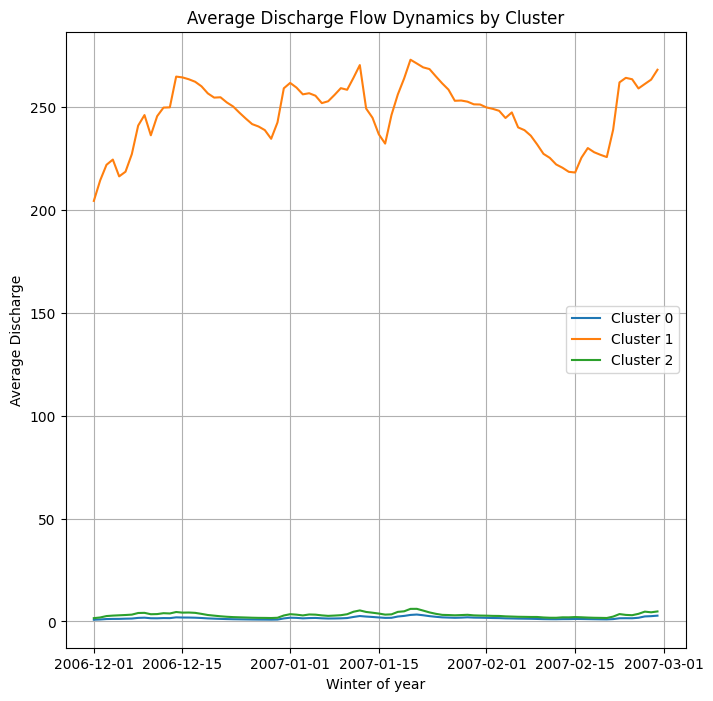

In [194]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [195]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [196]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2006-12-01  0.919159  0.652478  0.996123  1.062599  0.709007  2.525234   
2006-12-02  1.063660  0.763993  1.318986  1.195877  0.920105  2.511992   
2006-12-03  1.479370  0.848767  1.503716  1.319508  0.901729  2.487183   
2006-12-04  1.633382  0.952014  1.696054  1.379615  1.035705  2.505929   
2006-12-05  1.756617  0.901880  1.576894  1.356523  0.914197  2.569483   
...              ...       ...       ...       ...       ...       ...   
2007-02-24  1.342607  2.449185  5.715563  2.333599  1.104293  1.672102   
2007-02-25  1.481022  2.558517  5.863305  1.764384  1.414621  1.744802   
2007-02-26  2.122044  2.565146  6.248782  1.872029  2.138933  1.802962   
2007-02-27  2.932456  2.206041  5.881260  2.078676  2.269516  1.888080   
2007-02-28  3.270147  2.041180  5.335969  2.155139  3.315322  2.195252   

            11000016  12000001  13000011  13000019  ...  63000007  64000025  \
2006-12-01  2.249338  0.851041  0.789065  1.040539  ...  0.435085  0.568264   
2006-12-02  2.541077  1.154750  1.184392  1.446146  ...  0.411279  0.540472   
2006-12-03  2.702549  1.140635  1.387382  1.834609  ...  0.385394  0.501808   
2006-12-04  3.075220  1.569394  1.654989  2.212796  ...  0.366890  0.481988   
2006-12-05  3.041356  1.262405  1.389045  2.021232  ...  0.354919  0.465901   
...              ...       ...       ...       ...  ...       ...       ...   
2007-02-24  4.438285  0.950778  0.659381  1.095497  ...  1.787674  1.745658   
2007-02-25  4.731948  1.304455  0.906507  1.559472  ...  1.804920  2.709355   
2007-02-26  3.942900  1.850191  1.541931  2.853518  ...  2.307056  4.009270   
2007-02-27  4.200552  2.050991  3.034059  3.573697  ...  2.688724  3.472253   
2007-02-28  4.619523  2.703978  3.339905  4.323925  ...  2.931693  3.828702   

            66000014  67000017  67000018  67000019   7000003   8000001  \
2006-12-01  1.146877  0.319061  1.063024  2.996170  1.575700  1.554632   
2006-12-02  1.064465  0.308581  0.995902  2.790762  2.123842  1.826392   
2006-12-03  0.990886  0.295259  0.925480  2.516102  2.641138  2.211166   
2006-12-04  0.975576  0.293501  0.969834  2.453590  2.635464  2.300699   
2006-12-05  1.049040  0.364380  1.631306  2.968943  2.520645  2.183886   
...              ...       ...       ...       ...       ...       ...   
2007-02-24  0.724772  0.264179  0.732255  1.180902  2.472538  2.686048   
2007-02-25  0.779465  0.287117  0.595209  1.060196  2.092738  2.321213   
2007-02-26  1.727995  0.924420  1.838167  2.051622  2.400145  2.616507   
2007-02-27  2.678805  1.866428  4.074939  2.250440  2.732194  2.005434   
2007-02-28  3.394126  2.111680  5.440623  3.351296  3.301785  2.939177   

             9000001   9000015  
2006-12-01  2.205469  2.099114  
2006-12-02  2.251070  2.140805  
2006-12-03  2.417131  2.292627  
2006-12-04  2.768358  2.613737  
2006-12-05  3.195925  3.004642  
...              ...       ...  
2007-02-24  1.679410  1.618162  
2007-02-25  1.666396  1.606264  
2007-02-26  1.654501  1.595389  
2007-02-27  2.172023  2.068535  
2007-02-28  2.672756  2.526332  

[90 rows x 265 columns]

<Axes: >

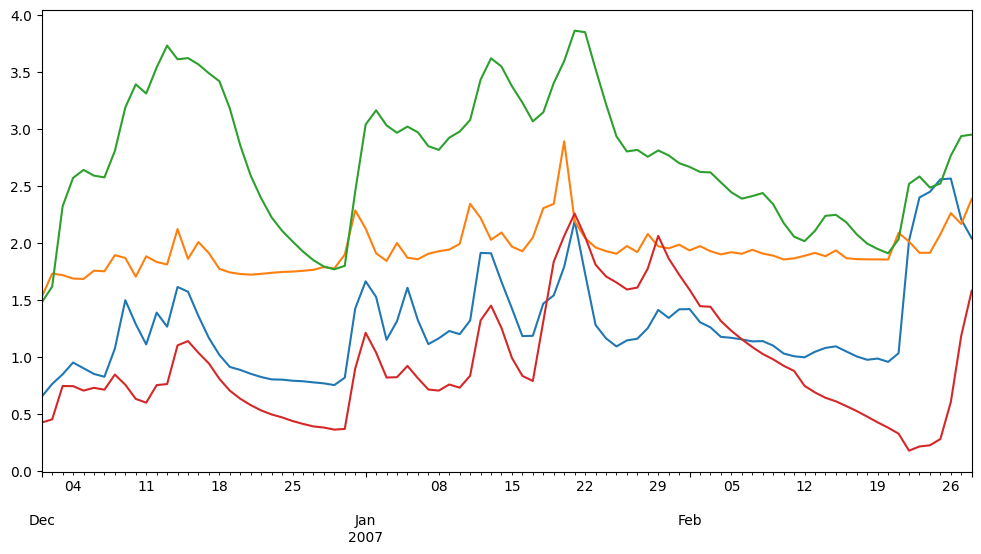

In [197]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

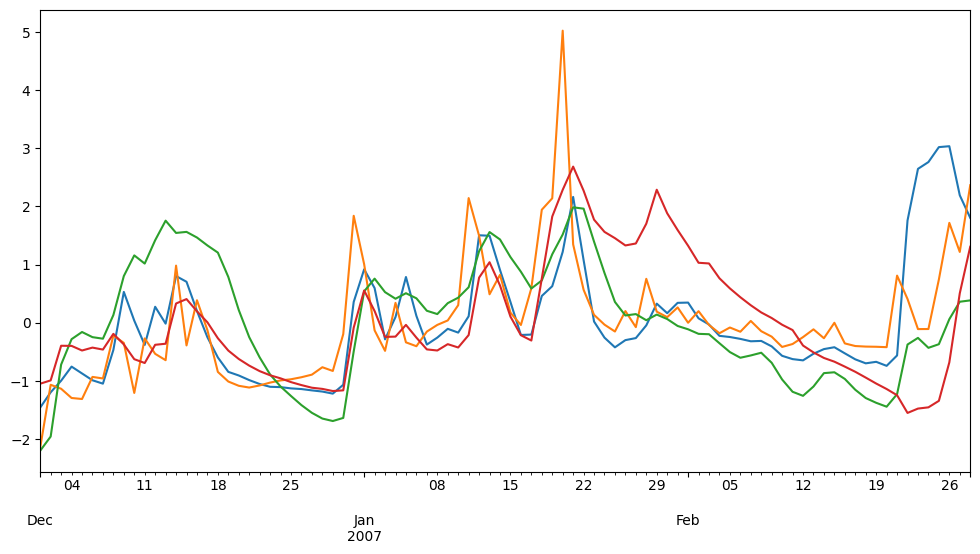

In [198]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

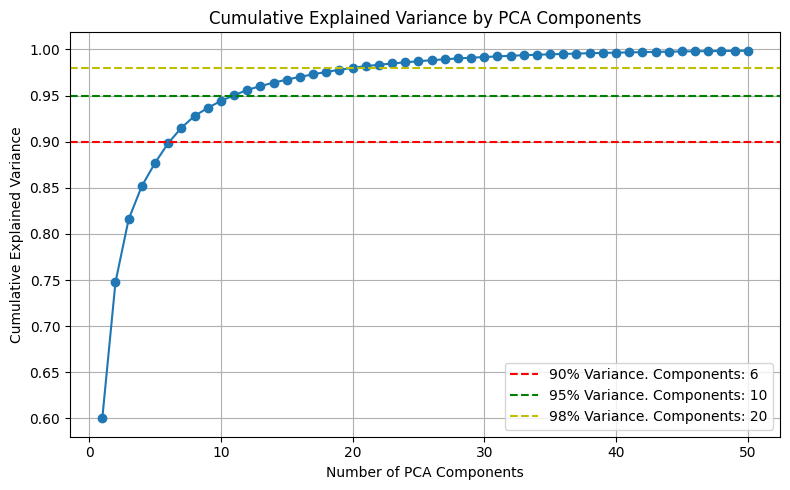

In [199]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [200]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-19.79652187,  -2.17268157,  -0.63075532, ...,   1.04306968,
          0.95186813,   0.70925337],
       [-16.41238451,  -4.6328708 ,  -1.59453927, ...,   0.49448293,
          0.75720125,  -0.37084343],
       [-10.12112794,  -7.59452043,  -0.85175524, ...,   0.81862118,
          0.42492882,  -0.46437733],
       ...,
       [ 17.84639077,   0.74437037, -15.03687167, ...,  -1.02134521,
         -1.65753067,   0.67220411],
       [ 19.76840702,   2.75163512, -10.4892458 , ...,   0.68465157,
         -0.34087759,  -0.55800295],
       [ 25.82501307,   1.60490427,  -9.65984461, ...,   1.86223771,
          0.82954983,  -0.14132536]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


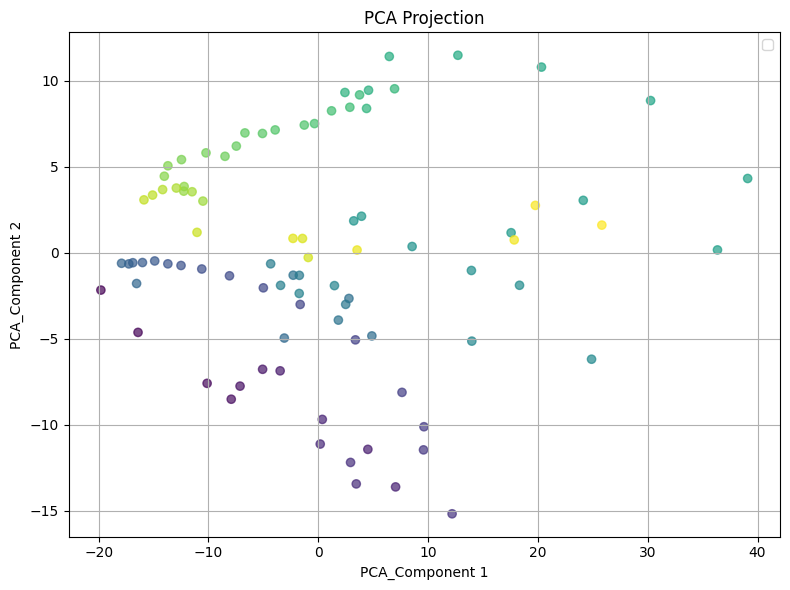

In [201]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31620\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


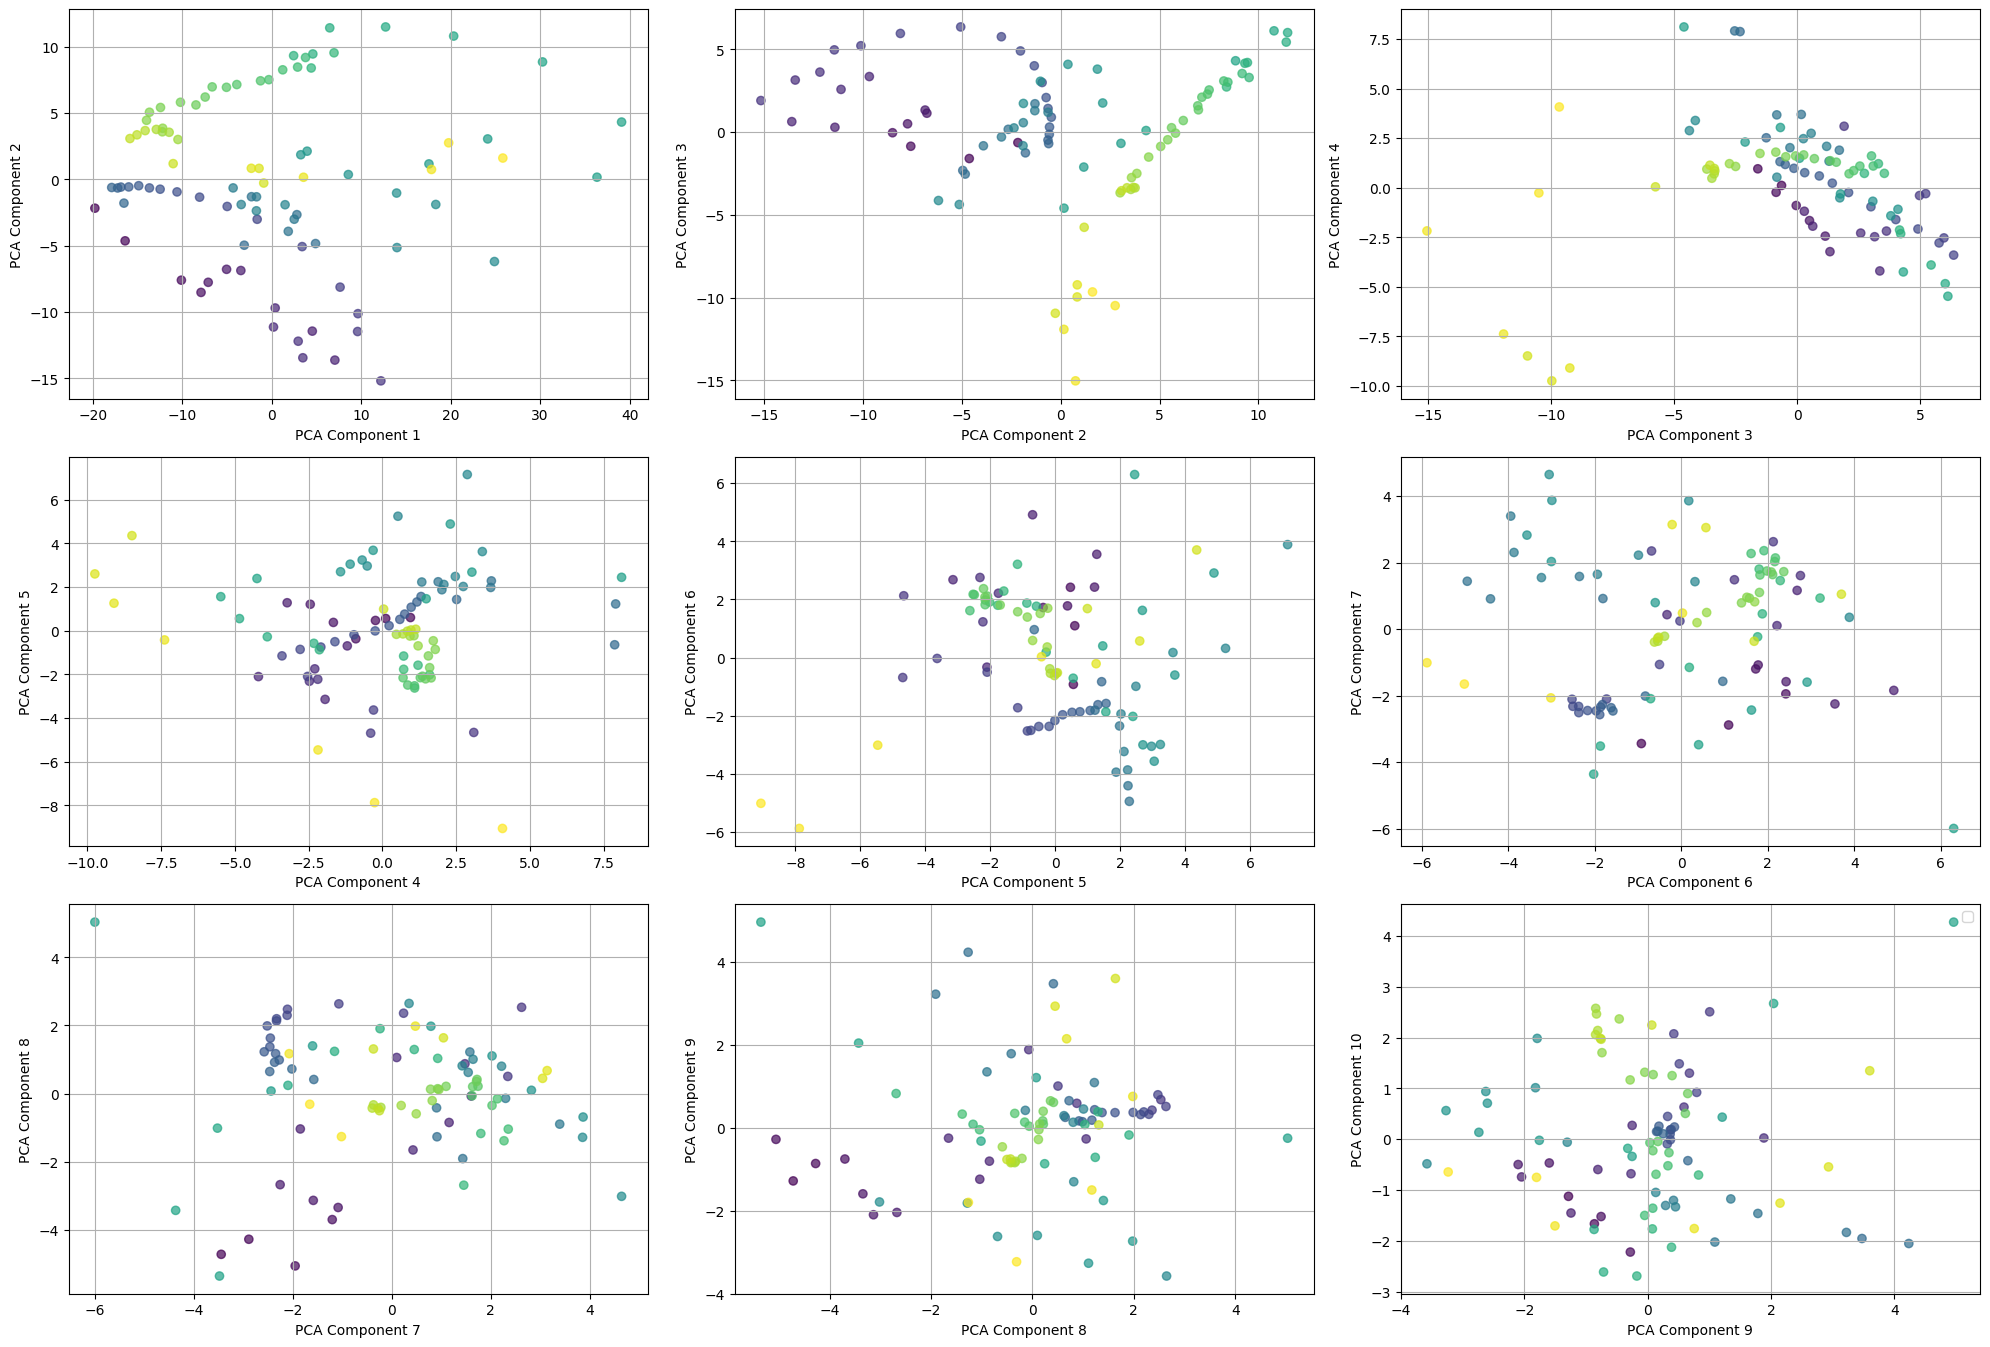

In [202]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [203]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.309
KMeans Davies-Bouldin Index is 1.235


<Axes: xlabel='k'>

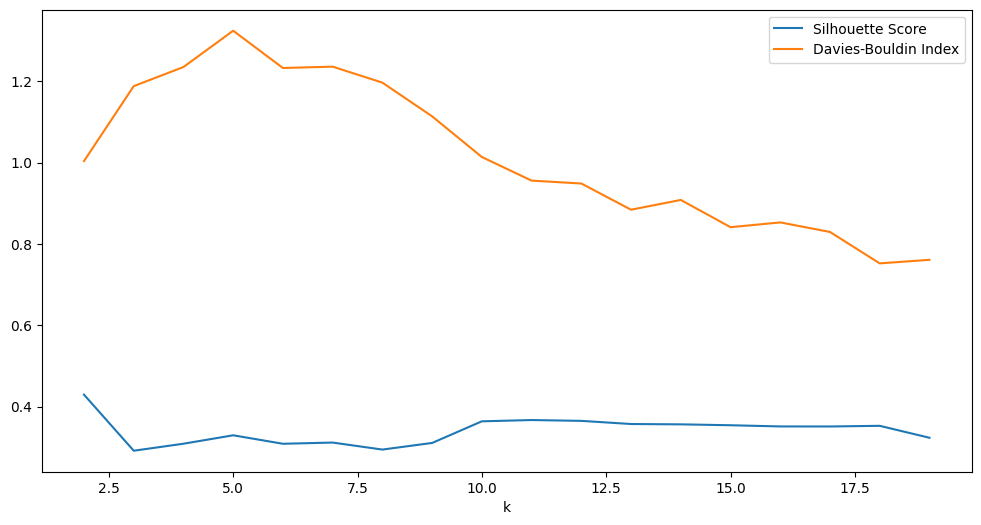

In [204]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         1     87               NaN   
3    1.27            3         2     83         -0.013541   
4    1.52            3         2     81          0.005790   
5    1.78            3         3     74         -0.035486   
6    2.03            3         4     71         -0.000679   
7    2.29            3         4     67          0.026687   
8    2.54            3         5     63          0.000360   
9    2.80            3         6     57         -0.017765   
10   3.05            3         3     55         -0.020749   
11   3.31            3         3     55         -0.020749   
12   3.56            3         3     52         -0.007457   
13   3.82            3         4     47          0.030915   
14   4.07            3         4     46          0.043315   
15   4.33            3         5     42          0.035049   
16   4.58            3         5     41          0.029830   
17   4.84            3         6     38          0.023607   
18   5.09            3         5     37          0.037552   
19   5.35            3         5     34          0.078131   
20   5.60            3         6     31          0.101910   
21   5.86            3         6     31          0.101910   
22   6.11            3         6     27          0.066531   
23   6.37            3         6     26          0.076512   
24   6.62            3         6     24          0.090329   
25   6.88            3         6     22          0.091612   
26   7.13            3         5     22          0.034562   
27   7.39            3         5     22          0.034562   
28   7.64            3         4     21          0.061173   
29   7.90            3         5     16          0.104442   
30   8.15            3         4     14          0.161512   
31   8.41            3         4     11          0.157206   
32   8.66            3         3     11          0.160187   
33   8.92            3         3     11          0.160187   
34   9.17            3         2     11          0.193693   
35   9.43            3         3      8          0.183149   
36   9.68            3         3      8          0.183149   
37   9.94            3         3      8          0.183149   
38  10.19            3         3      8          0.183149   
39  10.45            3         3      8          0.183149   
40  10.70            3         4      5          0.161956   
41  10.96            3         4      5          0.161956   
42  11.21            3         4      5          0.161956   
43  11.47            3         4      4          0.177045   
44  11.72            3         4      3          0.160216   
45  11.98            3         4      3          0.160216   
46  12.23            3         4      2          0.151520   
47  12.49            3         4      2          0.151520   
48  12.74            3         3      2          0.145685   
49  13.00            3         3      2          0.145685   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               0.862346  
4               0.886459  
5               1.074755  
6               0.992667  
7               1.012183  
8               1.100766  
9               1.230853  
10              1.394368  
11              1.394368  
12              1.448471  
13              1.384497  
14              1.364912  
15              1.301702  
16              1.303968  
17              1.395003  
18              1.420197  
19              1.475324  
20              1.400011  
21              1.400011  
22              1.699255  
23              1.807624  
24              1.918004  
25              1.880346  
26              1.808147  
27              1.808147  
28              1.751091  
29              1.332523  
30              1.276015  
31              1.340248  
32 

<Axes: xlabel='eps'>

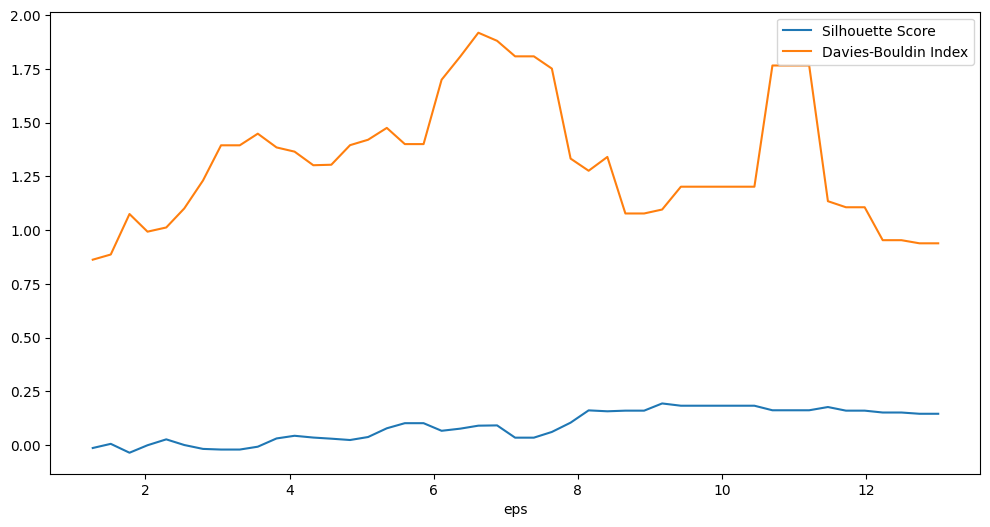

In [205]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

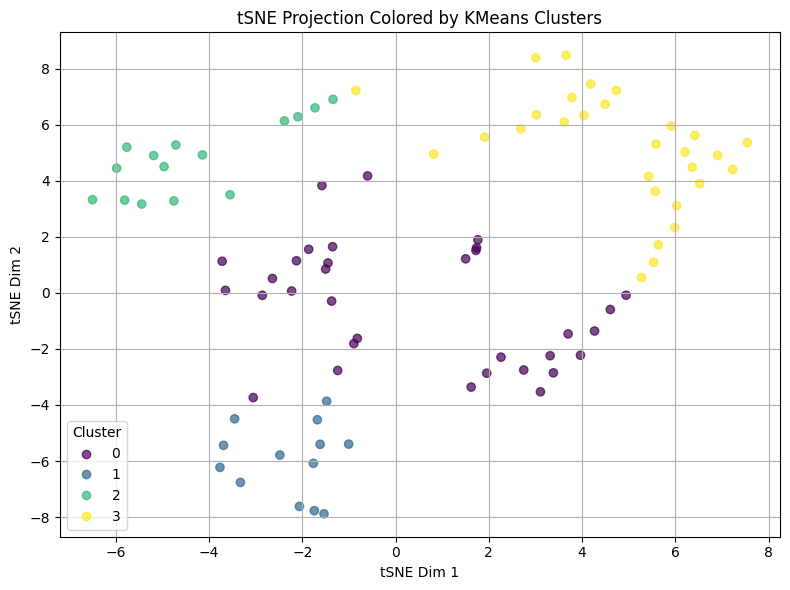

In [206]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        12    239          0.872553   
1    0.05            2        13    236          0.841978   
2    0.06            2        14    234          0.832114   
3    0.06            2        15    232          0.834617   
4    0.07            2        18    223          0.771135   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.729143   
196  0.99            2         2      2          0.729143   
197  0.99            2         2      2          0.729143   
198  1.00            2         2      2          0.729143   
199  1.00            2         2      2          0.729143   

     Davies-Bouldin Index  
0                0.153472  
1                0.178779  
2                0.188305  
3                0.185970  
4                0.253141  
..                    ...  
195              0.315205  
196              0.315205  
197              0.315205  
198              0.315205  
199              0.315205  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

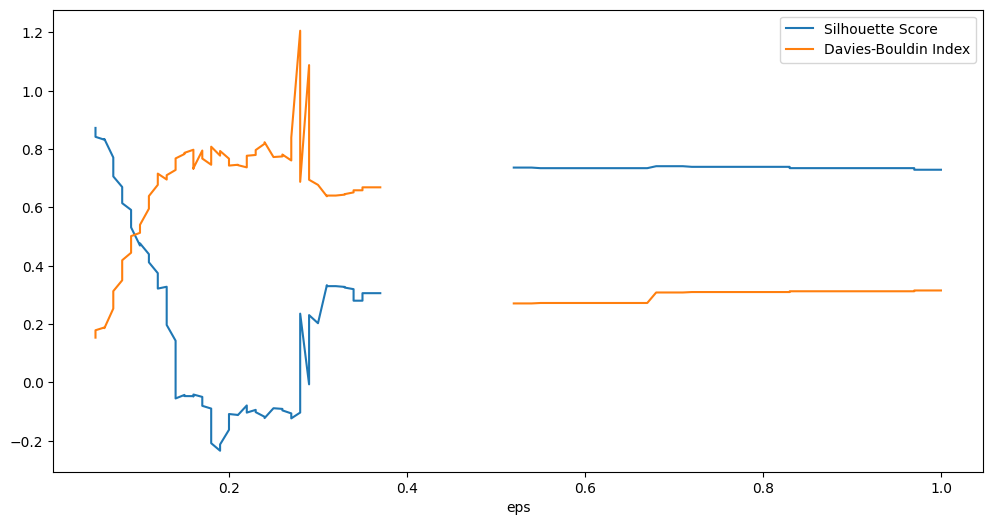

In [207]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))